In [ ]:
!pip install fasteda

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from fasteda import fast_eda
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/train-chirrosis.csv')

In [ ]:
data = data.drop(columns=["id"])

In [ ]:
data

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0        999  D-penicillamine  21532   M       N            N       N     N   
1       2574          Placebo  19237   F       N            N       N     N   
2       3428          Placebo  13727   F       N            Y       Y     Y   
3       2576          Placebo  18460   F       N            N       N     N   
4        788          Placebo  16658   F       N            Y       N     N   
...      ...              ...    ...  ..     ...          ...     ...   ...   
7900    1166  D-penicillamine  16839   F       N            N       N     N   
7901    1492          Placebo  17031   F       N            Y       N     N   
7902    1576  D-penicillamine  25873   F       N            N       Y     S   
7903    3584  D-penicillamine  22960   M       N            Y       N     N   
7904    1978  D-penicillamine  19237   F       N            N       N     N   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0           2.3        316.0     3.35   172.0    1601.0  179.80   
1           0.9        364.0     3.54    63.0    1440.0  134.85   
2           3.3        299.0     3.55   131.0    1029.0  119.35   
3           0.6        256.0     3.50    58.0    1653.0   71.30   
4           1.1        346.0     3.65    63.0    1181.0  125.55   
...         ...          ...      ...     ...       ...     ...   
7900        0.8        309.0     3.56    38.0    1629.0   79.05   
7901        0.9        260.0     3.43    62.0    1440.0  142.00   
7902        2.0        225.0     3.19    51.0     933.0   69.75   
7903        0.7        248.0     2.75    32.0    1003.0   57.35   
7904        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage Status  
0              63.0      394.0          9.7    3.0      D  
1              88.0      361.0         11.0    3.0      C  
2              50.0      199.0         11.7    4.0      D  
3              96.0      269.0         10.7    3.0      C  
4              96.0      298.0         10.6    4.0      C  
...             ...        ...          ...    ...    ...  
7900          224.0      344.0          9.9    2.0      C  
7901           78.0      277.0         10.0    4.0      C  
7902           62.0      200.0         12.7    2.0      D  
7903          118.0      221.0         10.6    4.0      D  
7904           85.0      336.0         10.3    3.0      C  

[7905 rows x 19 columns]

In [ ]:
# data = data[data['Status'] != 'CL']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [ ]:
data.describe()

N_Days           Age    Bilirubin  Cholesterol      Albumin  \
count  7905.000000   7905.000000  7905.000000  7905.000000  7905.000000   
mean   2030.173308  18373.146490     2.594485   350.561923     3.548323   
std    1094.233744   3679.958739     3.812960   195.379344     0.346171   
min      41.000000   9598.000000     0.300000   120.000000     1.960000   
25%    1230.000000  15574.000000     0.700000   248.000000     3.350000   
50%    1831.000000  18713.000000     1.100000   298.000000     3.580000   
75%    2689.000000  20684.000000     3.000000   390.000000     3.770000   
max    4795.000000  28650.000000    28.000000  1775.000000     4.640000   

            Copper      Alk_Phos         SGOT  Tryglicerides    Platelets  \
count  7905.000000   7905.000000  7905.000000    7905.000000  7905.000000   
mean     83.902846   1816.745250   114.604602     115.340164   265.228969   
std      75.899266   1903.750657    48.790945      52.530402    87.465579   
min       4.000000    289.000000    26.350000      33.000000    62.000000   
25%      39.000000    834.000000    75.950000      84.000000   211.000000   
50%      63.000000   1181.000000   108.500000     104.000000   265.000000   
75%     102.000000   1857.000000   137.950000     139.000000   316.000000   
max     588.000000  13862.400000   457.250000     598.000000   563.000000   

       Prothrombin        Stage  
count  7905.000000  7905.000000  
mean     10.629462     3.032511  
std       0.781735     0.866511  
min       9.000000     1.000000  
25%      10.000000     2.000000  
50%      10.600000     3.000000  
75%      11.000000     4.000000  
max      18.000000     4.000000

In [ ]:
object_data = data.select_dtypes(include='object')
numeric_data = data.select_dtypes(exclude='object')

In [ ]:
for col in object_data.columns:
  print("\n-----------------------------------")
  print(f'{col}: {data[col].unique()}')
  print("-----------------------------------\n")
  print(data[col].value_counts())


-----------------------------------
Drug: ['D-penicillamine' 'Placebo']
-----------------------------------

Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64

-----------------------------------
Sex: ['M' 'F']
-----------------------------------

Sex
F    7336
M     569
Name: count, dtype: int64

-----------------------------------
Ascites: ['N' 'Y']
-----------------------------------

Ascites
N    7525
Y     380
Name: count, dtype: int64

-----------------------------------
Hepatomegaly: ['N' 'Y']
-----------------------------------

Hepatomegaly
Y    4042
N    3863
Name: count, dtype: int64

-----------------------------------
Spiders: ['N' 'Y']
-----------------------------------

Spiders
N    5966
Y    1939
Name: count, dtype: int64

-----------------------------------
Edema: ['N' 'Y' 'S']
-----------------------------------

Edema
N    7161
S     399
Y     345
Name: count, dtype: int64

-----------------------------------
Status: ['D' 'C' 'CL']
----

In [ ]:
def plot_hist(data,ax=0):
  sns.histplot(data, kde=True)
  plt.show()

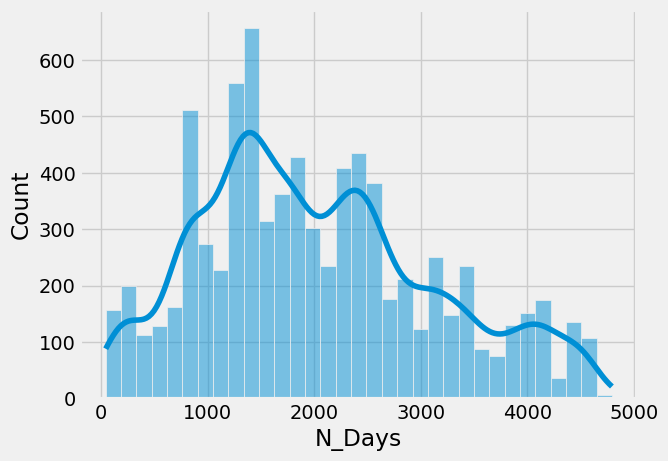

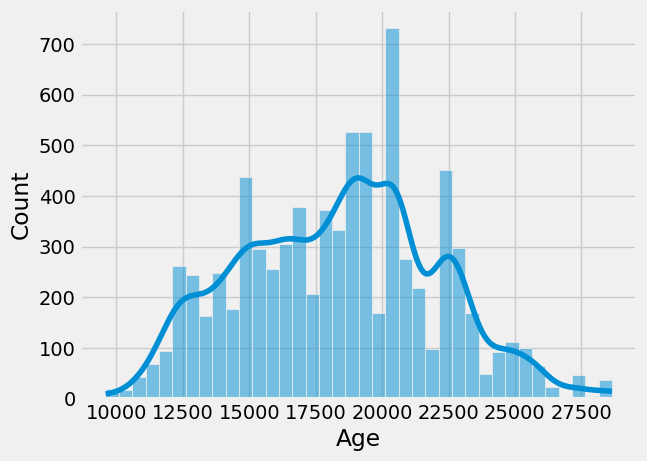

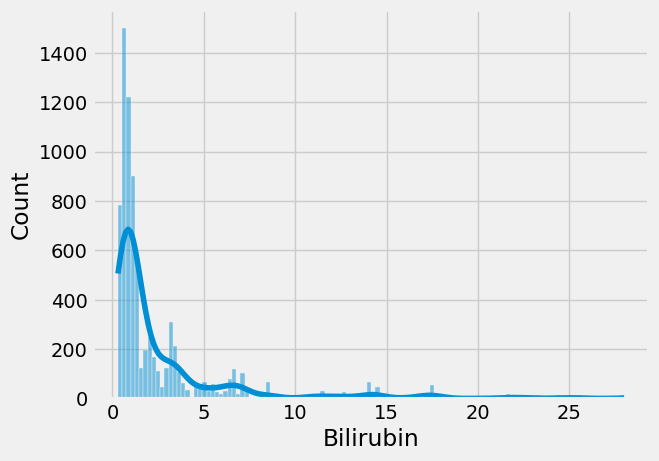

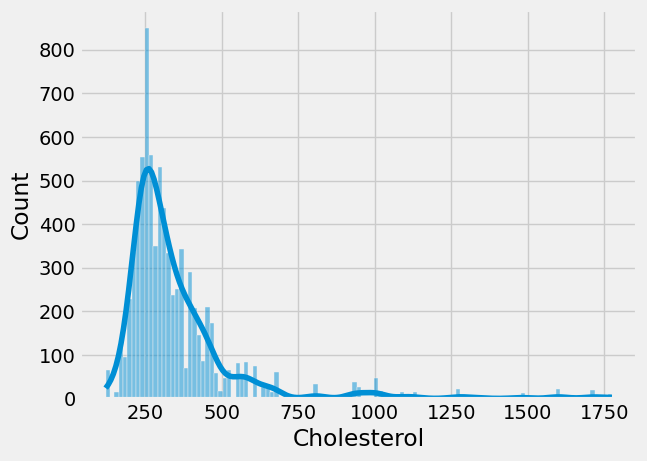

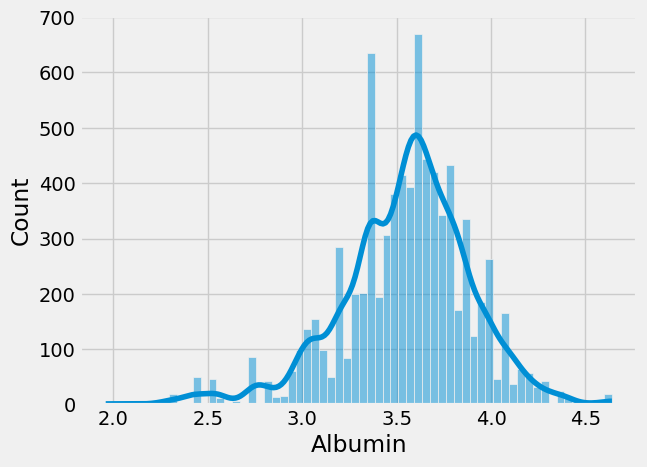

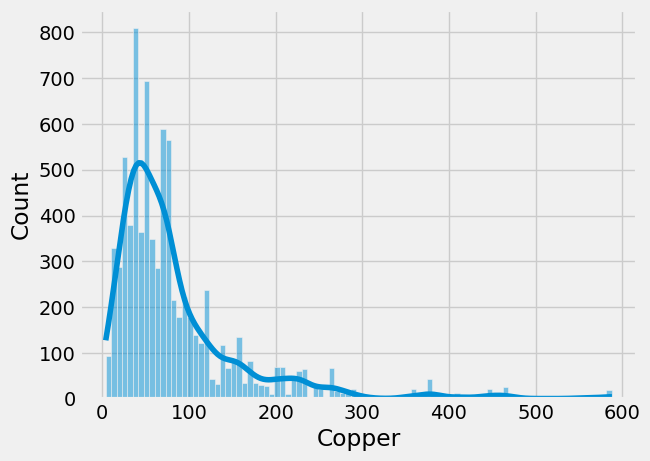

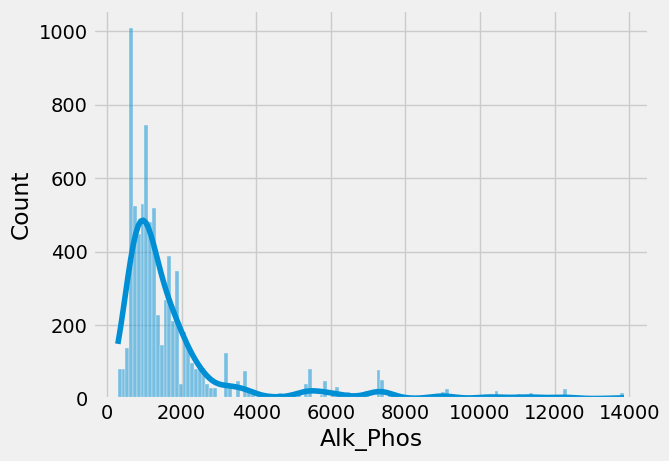

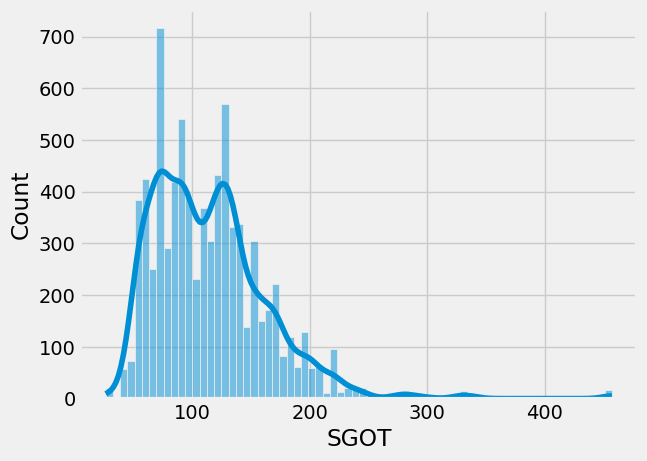

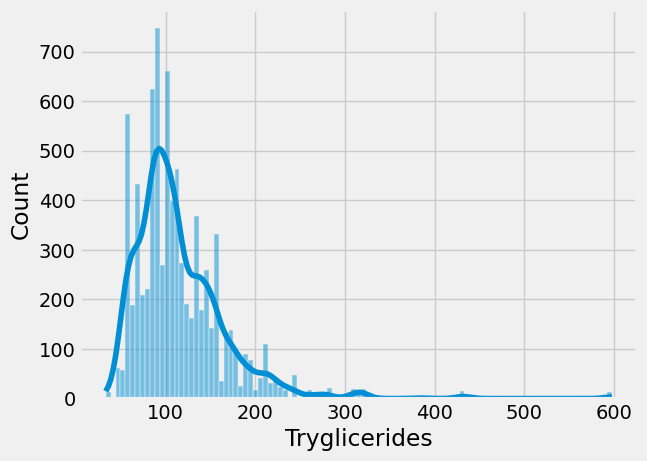

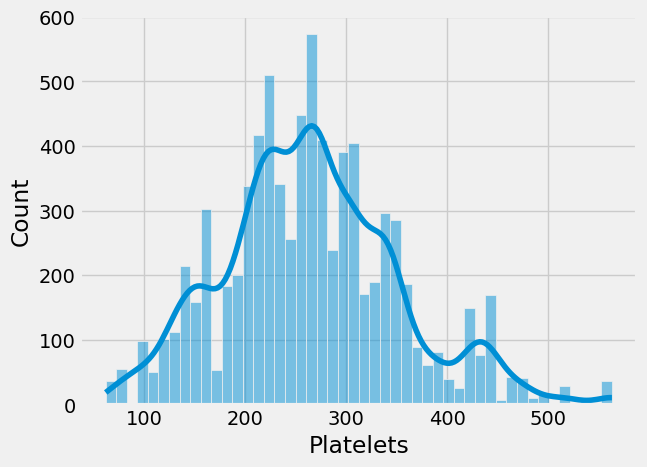

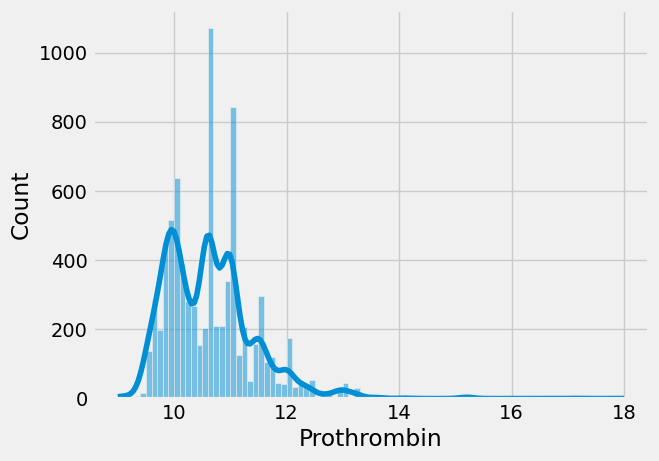

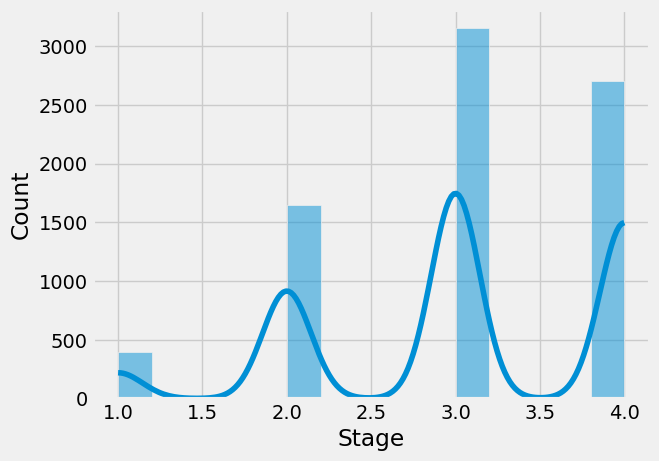

In [ ]:
for col in numeric_data.columns:
  plot_hist(numeric_data[col])

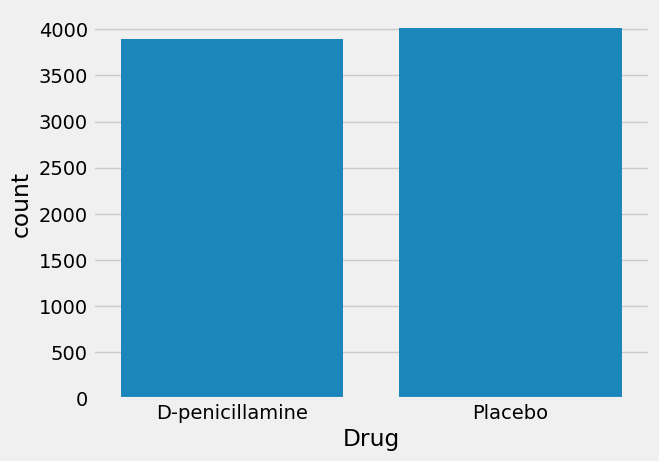

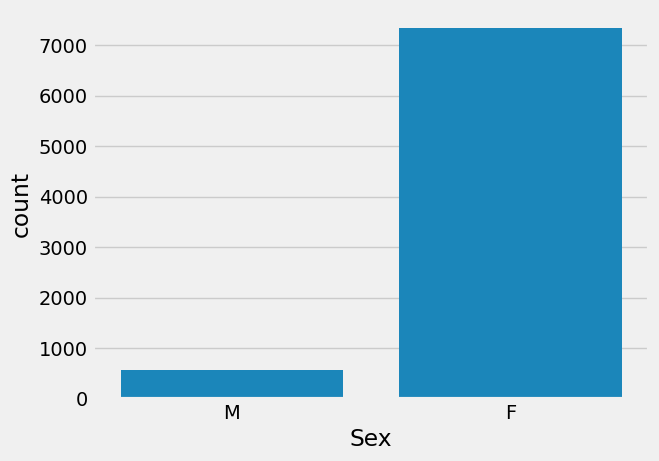

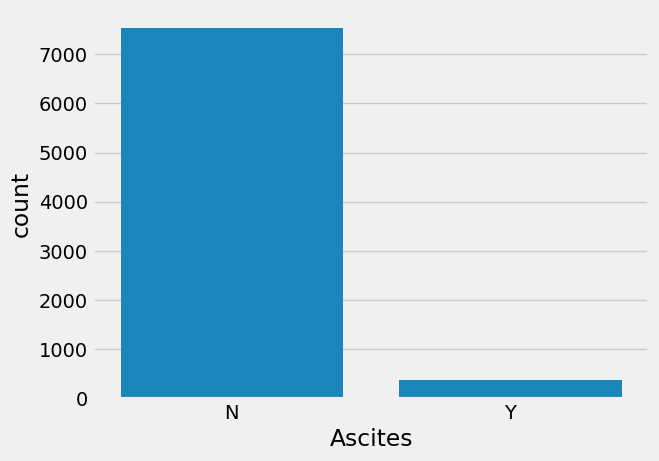

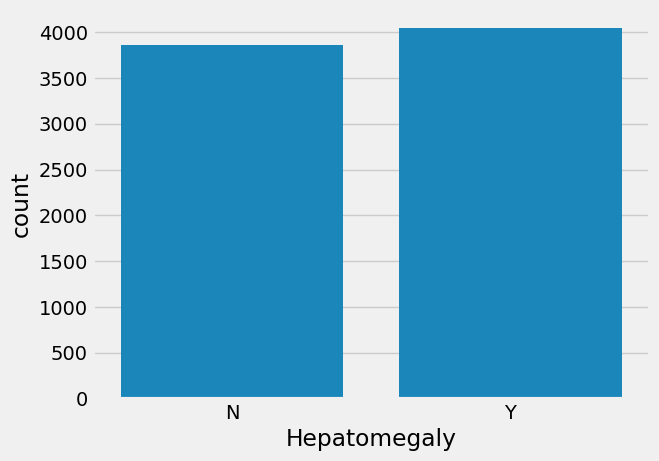

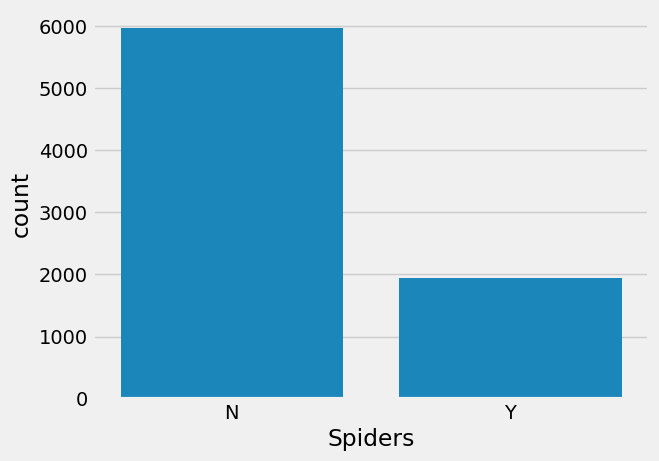

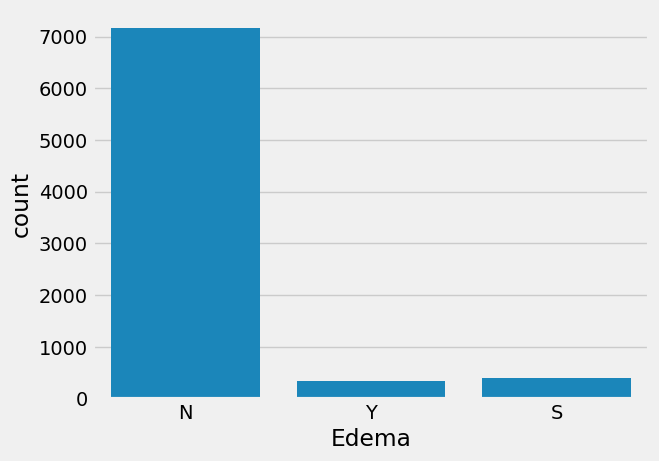

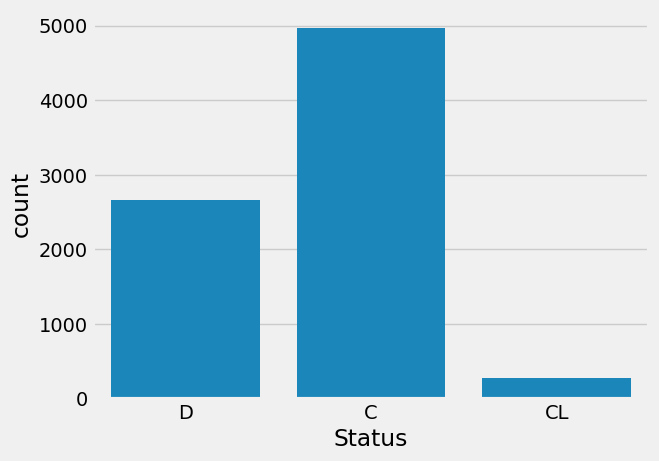

In [ ]:
for col in object_data.columns:
  sns.countplot(data=data, x=col)
  plt.show()

In [ ]:
def parse_object(data):

    data["Drug"] = data["Drug"].map({"Placebo": 0, "D-penicillamine": 1})
    data["Sex"] = data["Sex"].map({"M": 0, "F": 1})

    for col in ["Ascites", "Hepatomegaly", "Spiders"]:
        data[col] = data[col].map({"N": 0, "Y": 1})

    data["Edema"] = data["Edema"].map({"N": 0, "S": 1, "Y": 1})

    return data

In [ ]:
parsed_data = parse_object(data)

In [ ]:
parsed_data

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0        999     1  21532    0        0             0        0      0   
1       2574     0  19237    1        0             0        0      0   
2       3428     0  13727    1        0             1        1      1   
3       2576     0  18460    1        0             0        0      0   
4        788     0  16658    1        0             1        0      0   
...      ...   ...    ...  ...      ...           ...      ...    ...   
7900    1166     1  16839    1        0             0        0      0   
7901    1492     0  17031    1        0             1        0      0   
7902    1576     1  25873    1        0             0        1      1   
7903    3584     1  22960    0        0             1        0      0   
7904    1978     1  19237    1        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0           2.3        316.0     3.35   172.0    1601.0  179.80   
1           0.9        364.0     3.54    63.0    1440.0  134.85   
2           3.3        299.0     3.55   131.0    1029.0  119.35   
3           0.6        256.0     3.50    58.0    1653.0   71.30   
4           1.1        346.0     3.65    63.0    1181.0  125.55   
...         ...          ...      ...     ...       ...     ...   
7900        0.8        309.0     3.56    38.0    1629.0   79.05   
7901        0.9        260.0     3.43    62.0    1440.0  142.00   
7902        2.0        225.0     3.19    51.0     933.0   69.75   
7903        0.7        248.0     2.75    32.0    1003.0   57.35   
7904        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage Status  
0              63.0      394.0          9.7    3.0      D  
1              88.0      361.0         11.0    3.0      C  
2              50.0      199.0         11.7    4.0      D  
3              96.0      269.0         10.7    3.0      C  
4              96.0      298.0         10.6    4.0      C  
...             ...        ...          ...    ...    ...  
7900          224.0      344.0          9.9    2.0      C  
7901           78.0      277.0         10.0    4.0      C  
7902           62.0      200.0         12.7    2.0      D  
7903          118.0      221.0         10.6    4.0      D  
7904           85.0      336.0         10.3    3.0      C  

[7905 rows x 19 columns]

In [ ]:
TARGET = "Status"
FEATURES = [col for col in parsed_data.columns if col not in [TARGET]]

FEATURES

['N_Days',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [ ]:
parsed_data[TARGET] = parsed_data[TARGET].map({"D": 2,"CL":1, "C": 0})

DataFrame Head:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     999     1  21532    0        0             0        0      0        2.3   
1    2574     0  19237    1        0             0        0      0        0.9   
2    3428     0  13727    1        0             1        1      1        3.3   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        316.0     3.35   172.0    1601.0  179.80           63.0      394.0   
1        364.0     3.54    63.0    1440.0  134.85           88.0      361.0   
2        299.0     3.55   131.0    1029.0  119.35           50.0      199.0   

   Prothrombin  Stage  Status  
0          9.7    3.0       2  
1         11.0    3.0       0  
2         11.7    4.0       2

DataFrame Tail:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
7902    1576     1  25873    1        0             0        1      1   
7903    3584     1  22960    0        0             1        0      0   
7904    1978     1  19237    1        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  Tryglicerides  \
7902        2.0        225.0     3.19    51.0     933.0  69.75           62.0   
7903        0.7        248.0     2.75    32.0    1003.0  57.35          118.0   
7904        0.7        256.0     3.23    22.0     645.0  74.40           85.0   

      Platelets  Prothrombin  Stage  Status  
7902      200.0         12.7    2.0       2  
7903      221.0         10.6    4.0       2  
7904      336.0         10.3    3.0       0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(7905, 19)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   int64  
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   int64  
 4   Ascites        7905 non-null   int64  
 5   Hepatomegaly   7905 non-null   int64  
 6   Spiders        7905 non-null   int64  
 7   Edema          7905 non-null   int64  
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



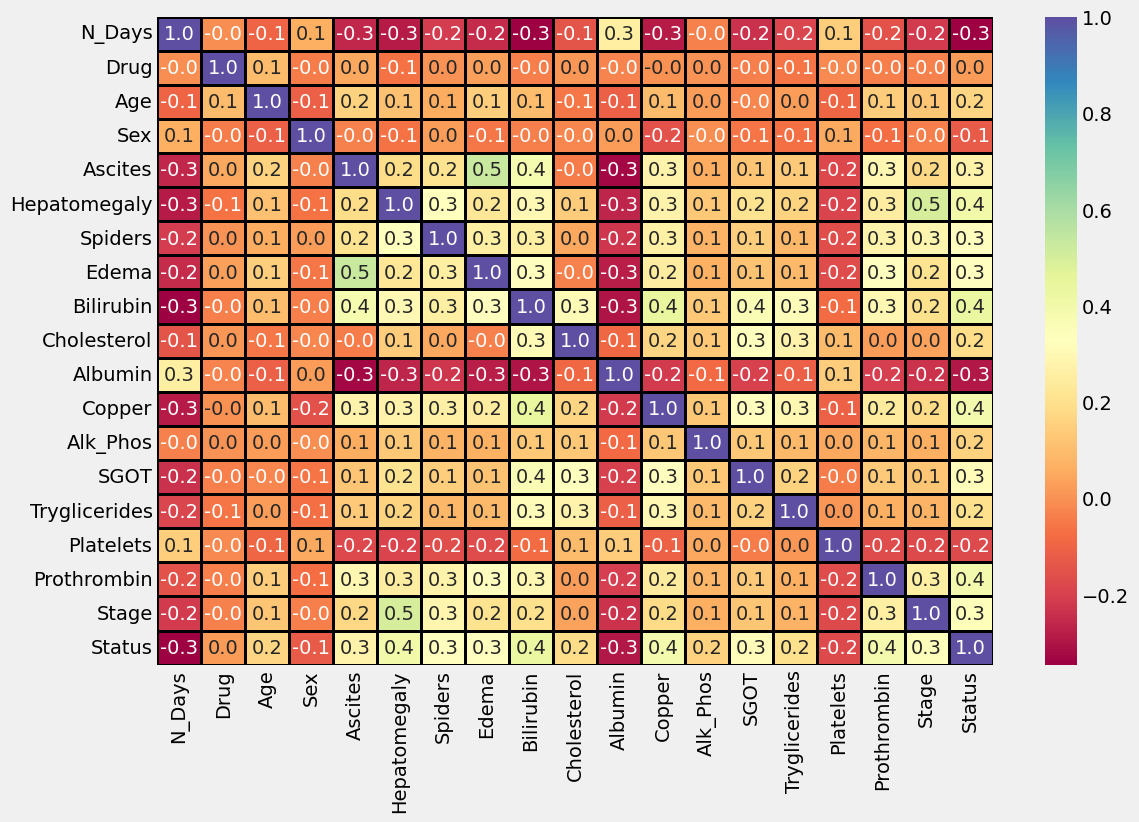

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



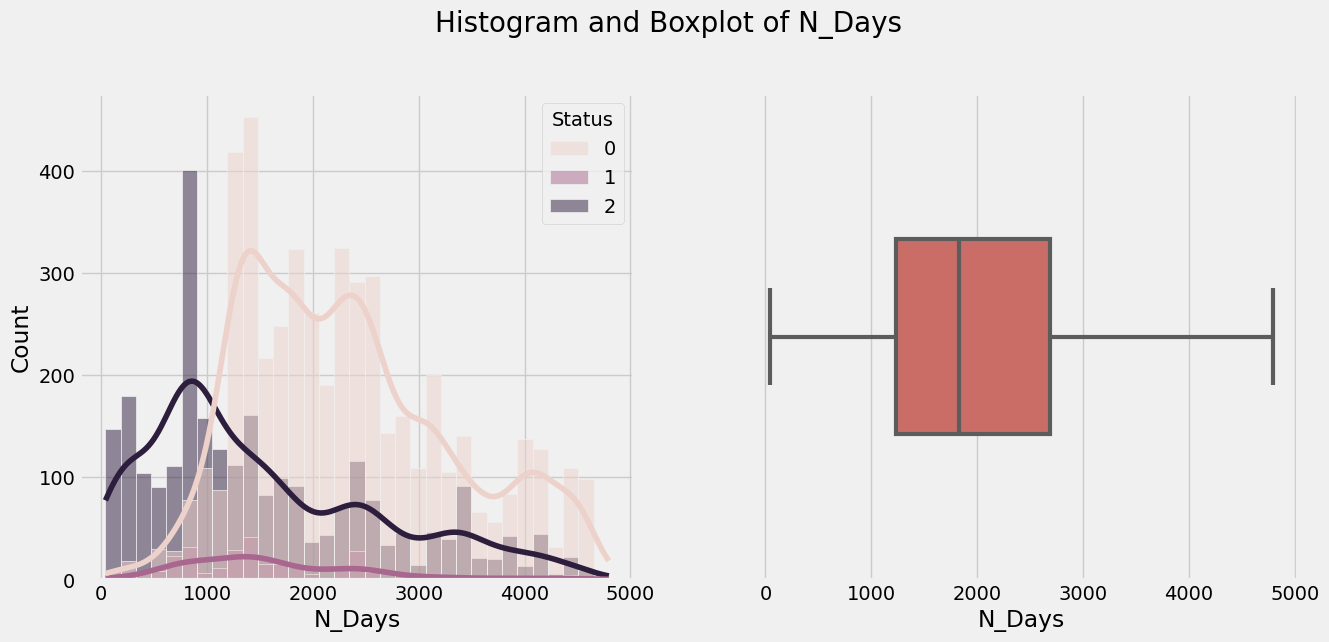

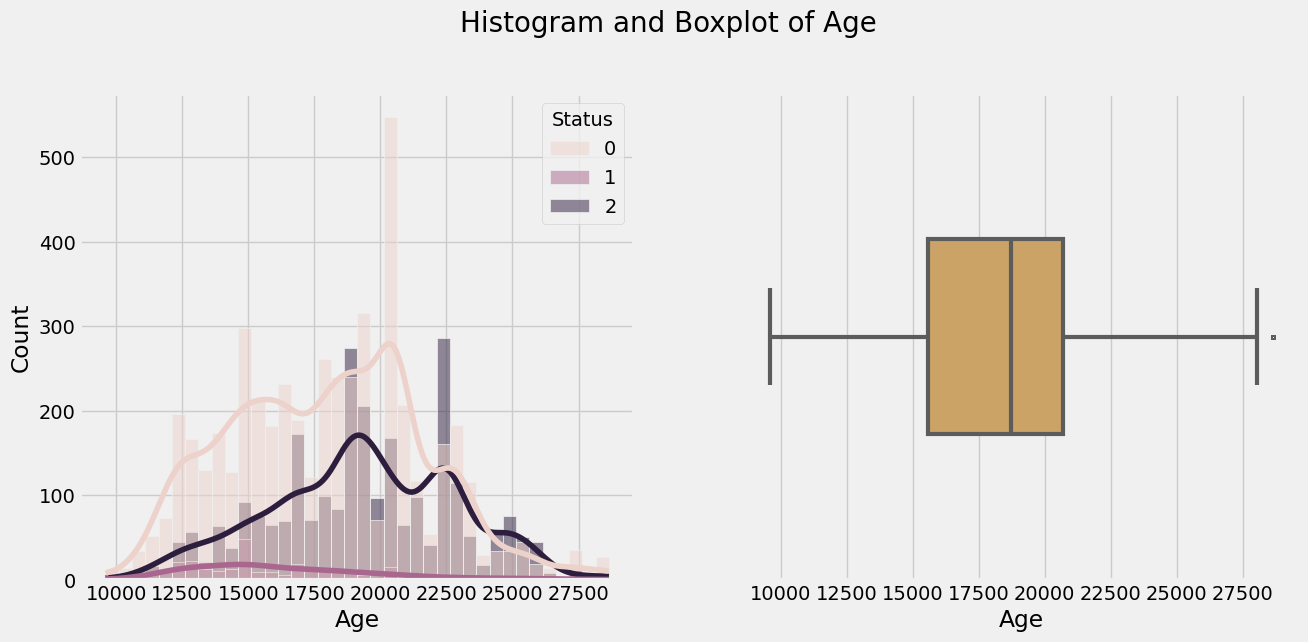

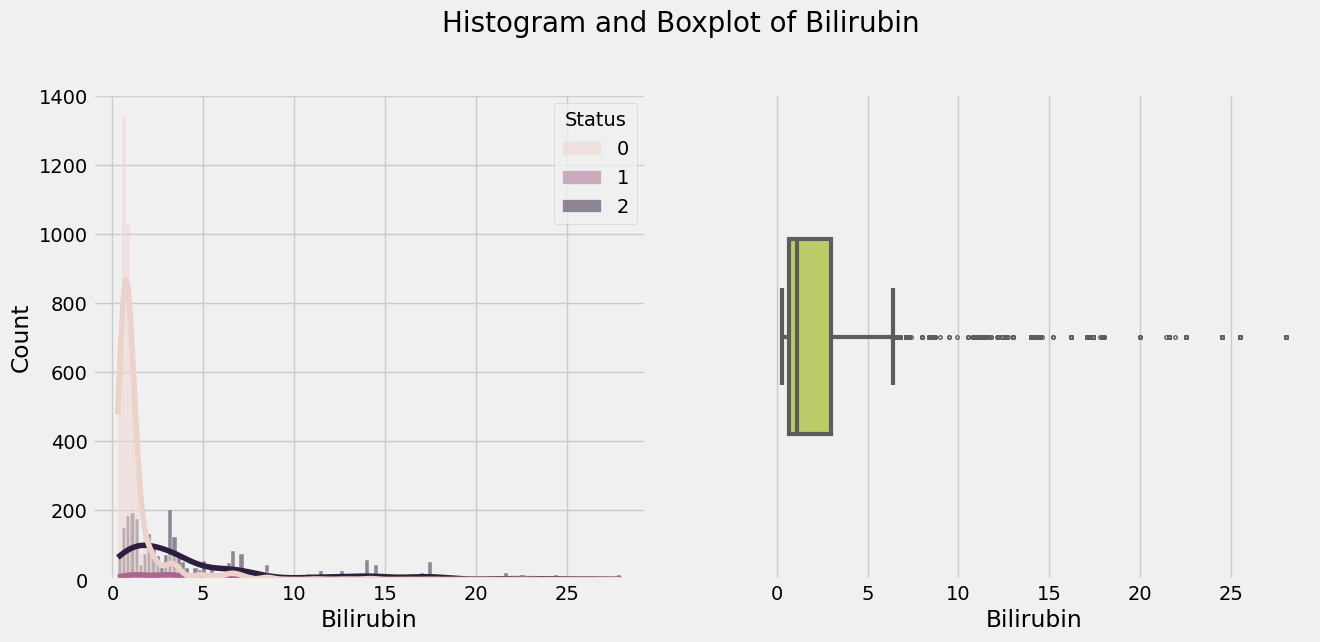

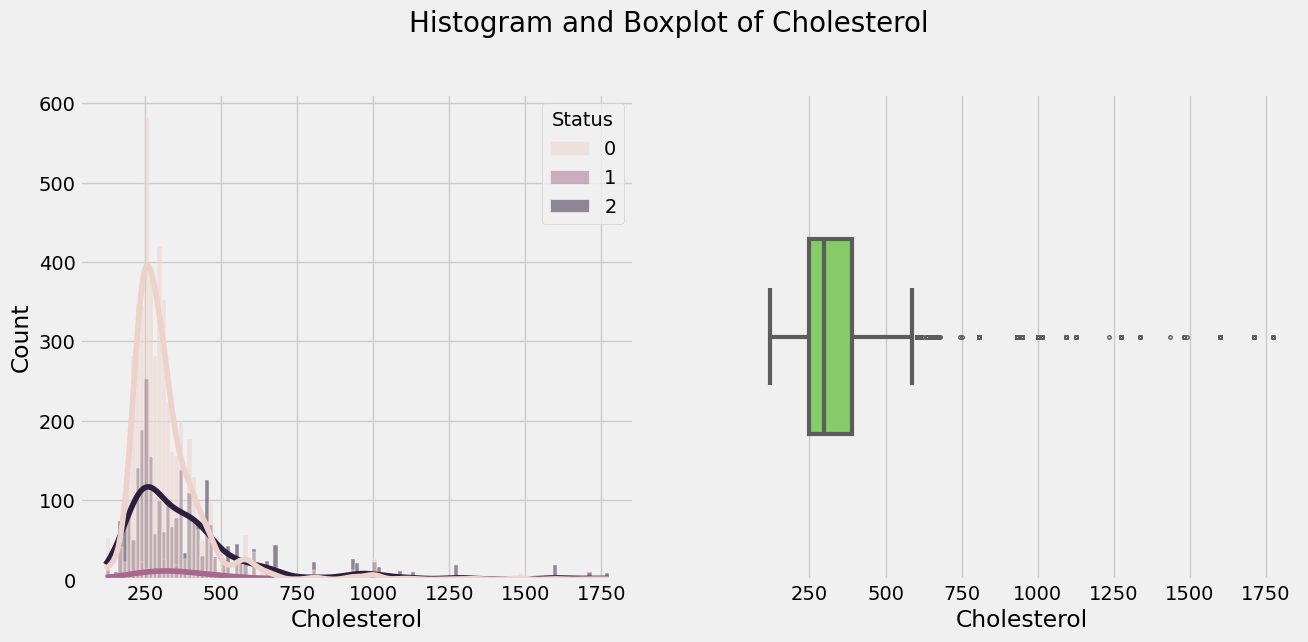

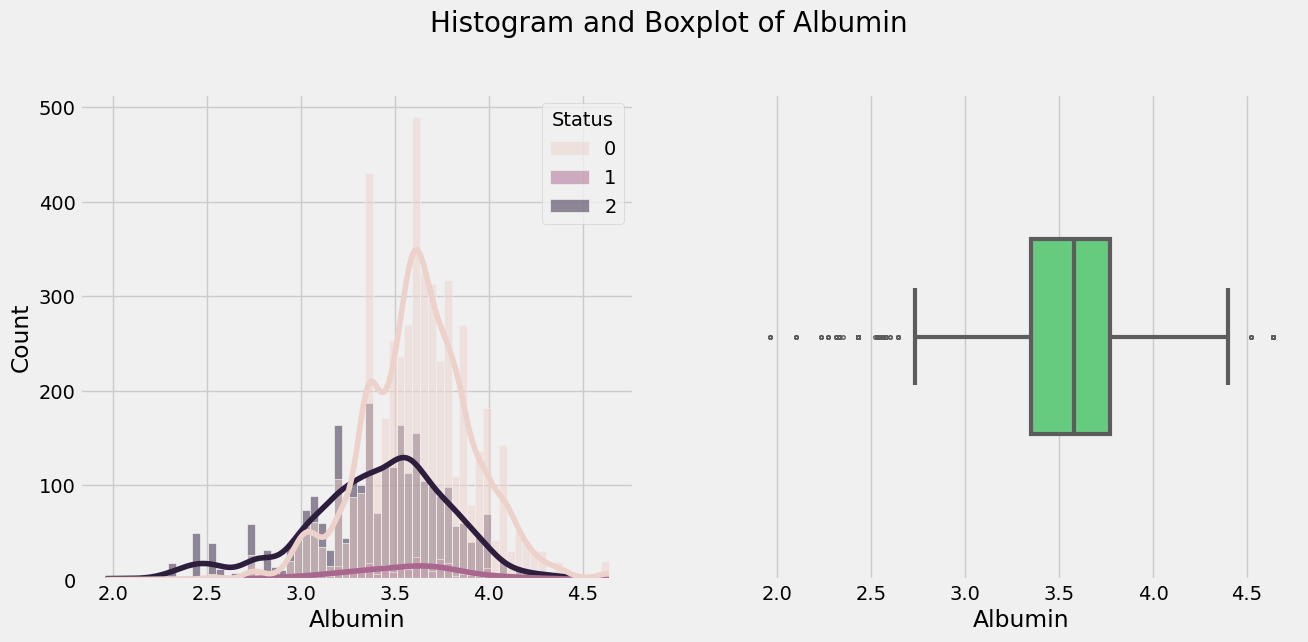

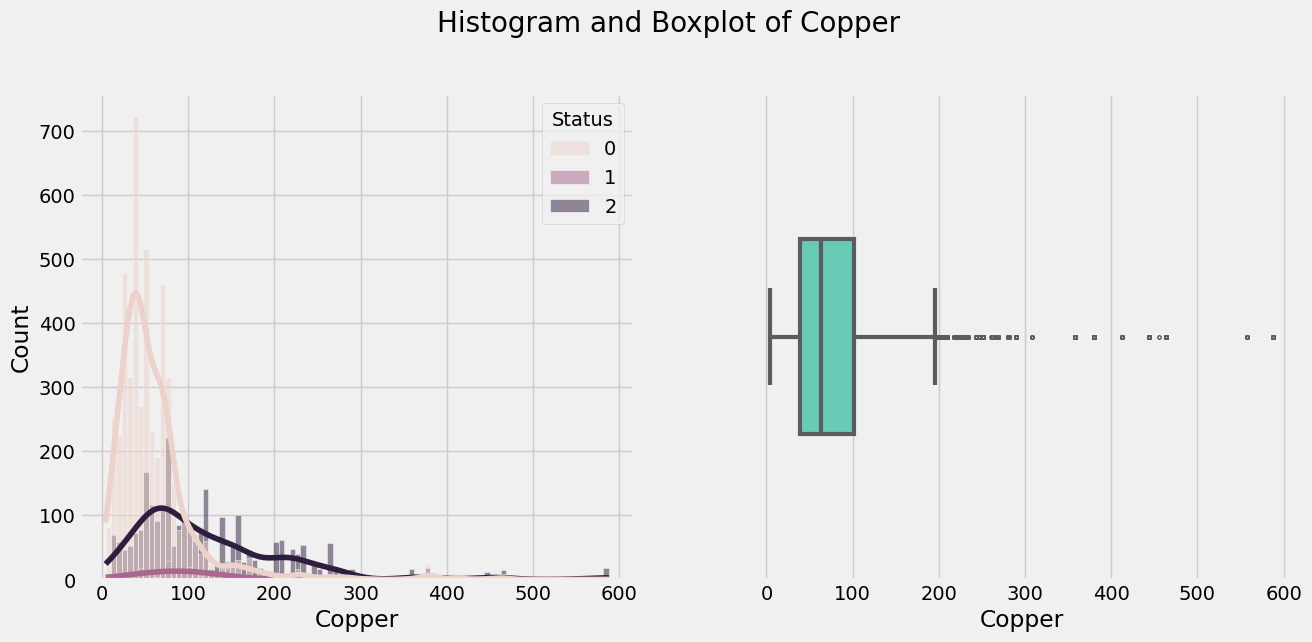

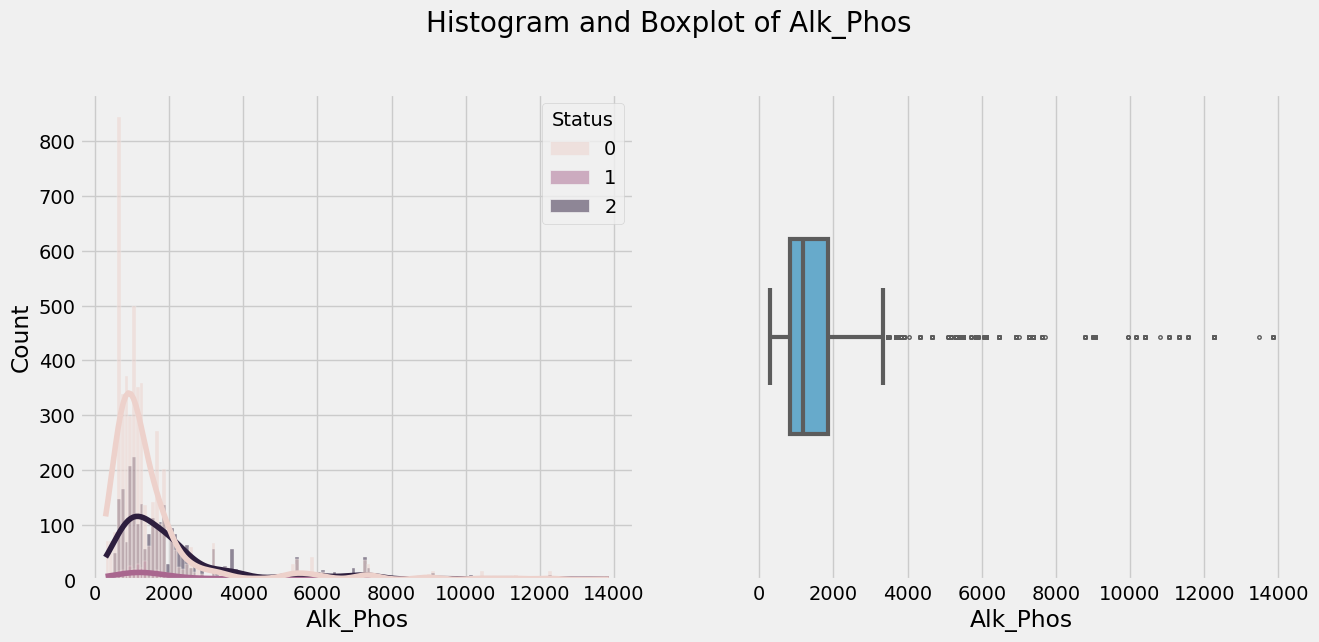

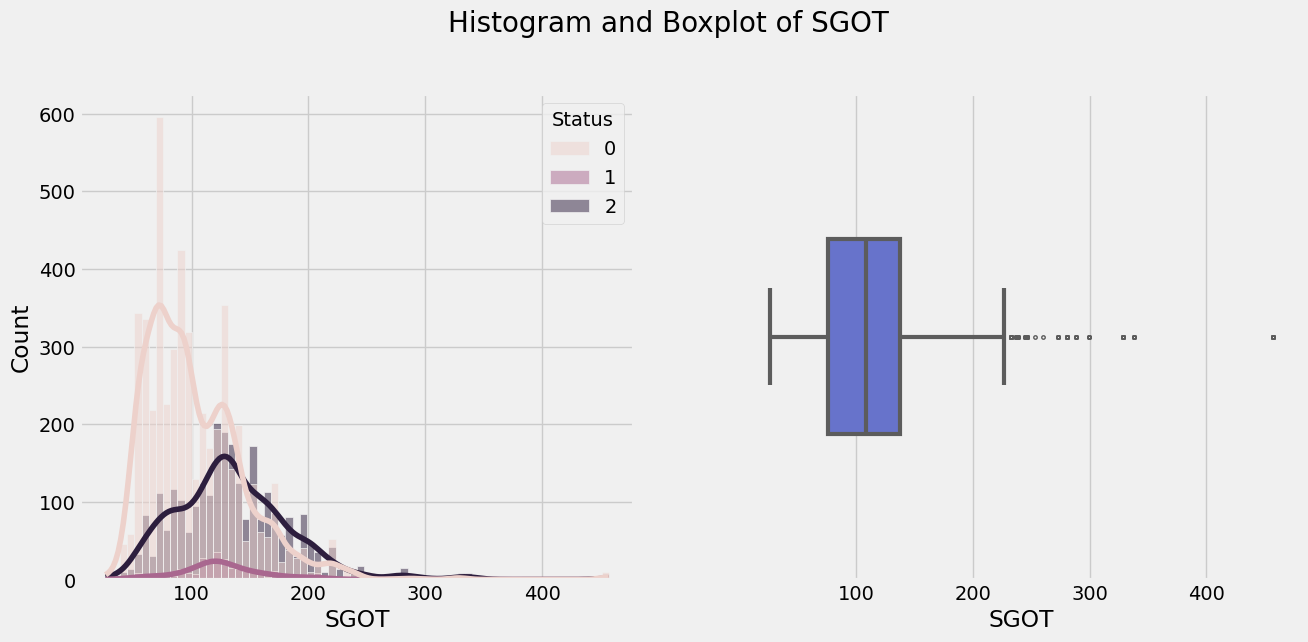

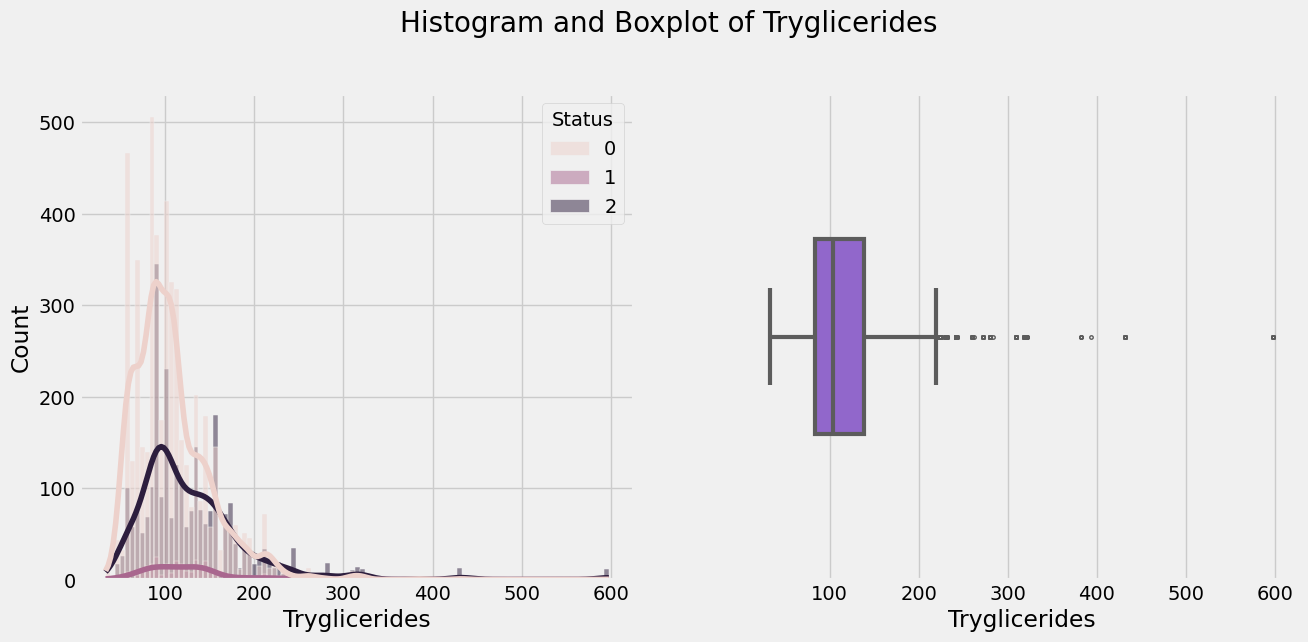

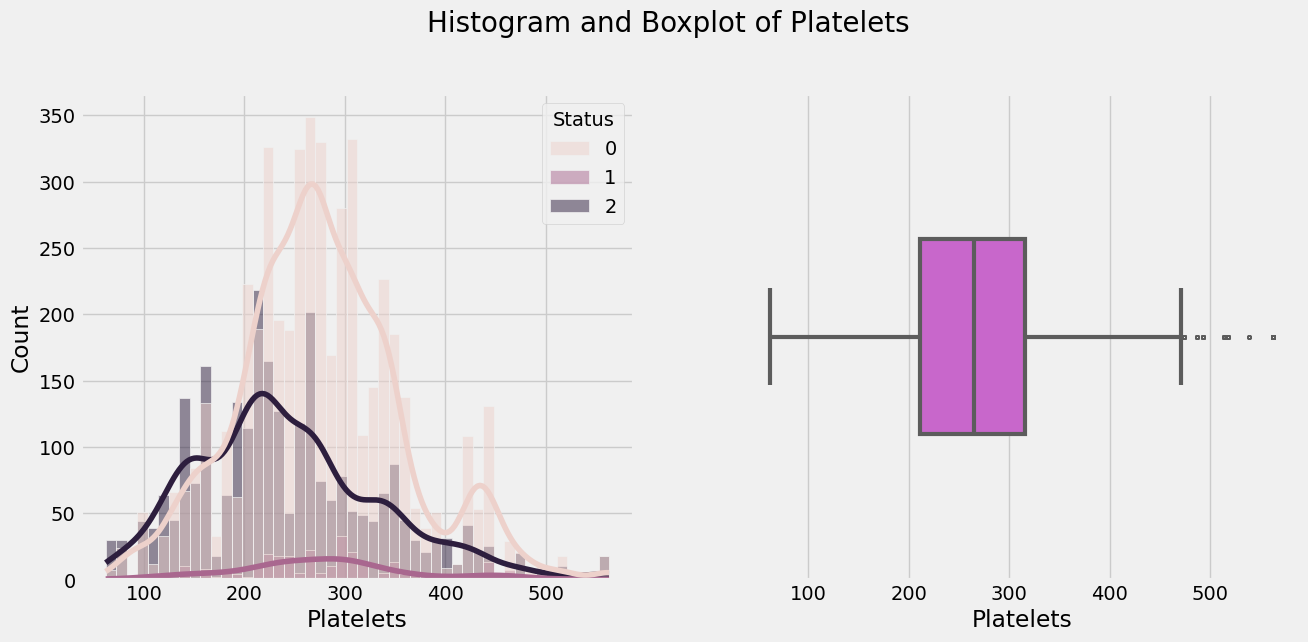

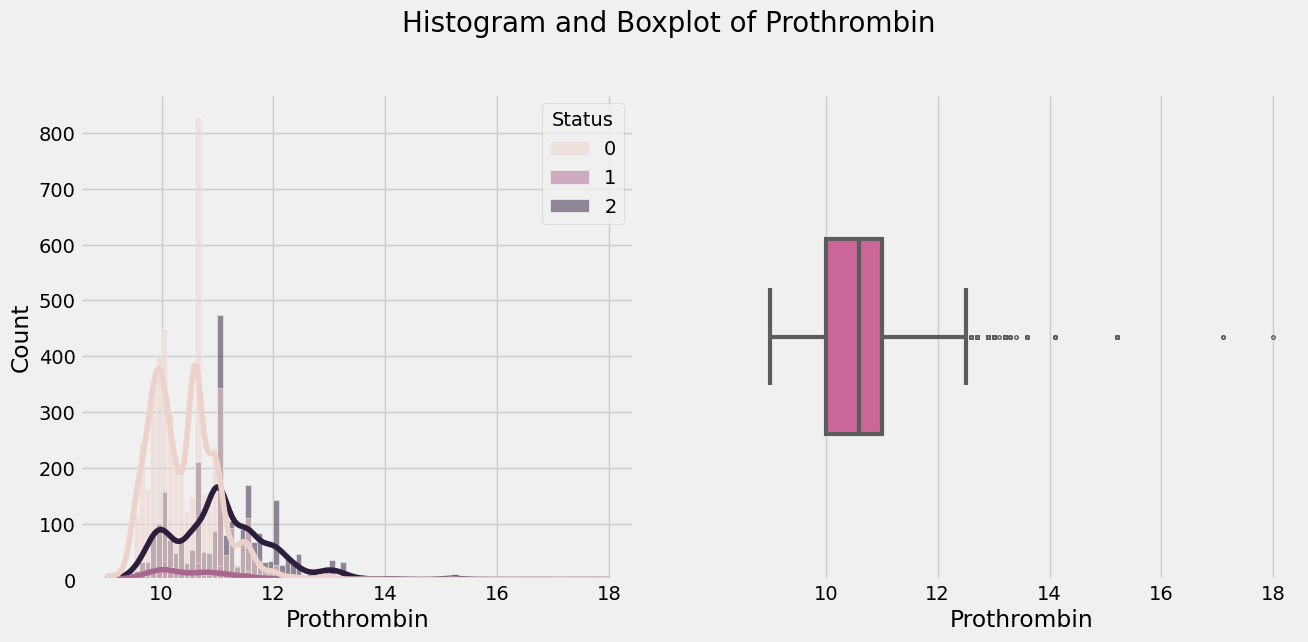

----------------------------------------------------------------------------------------------------
Countplot(s):



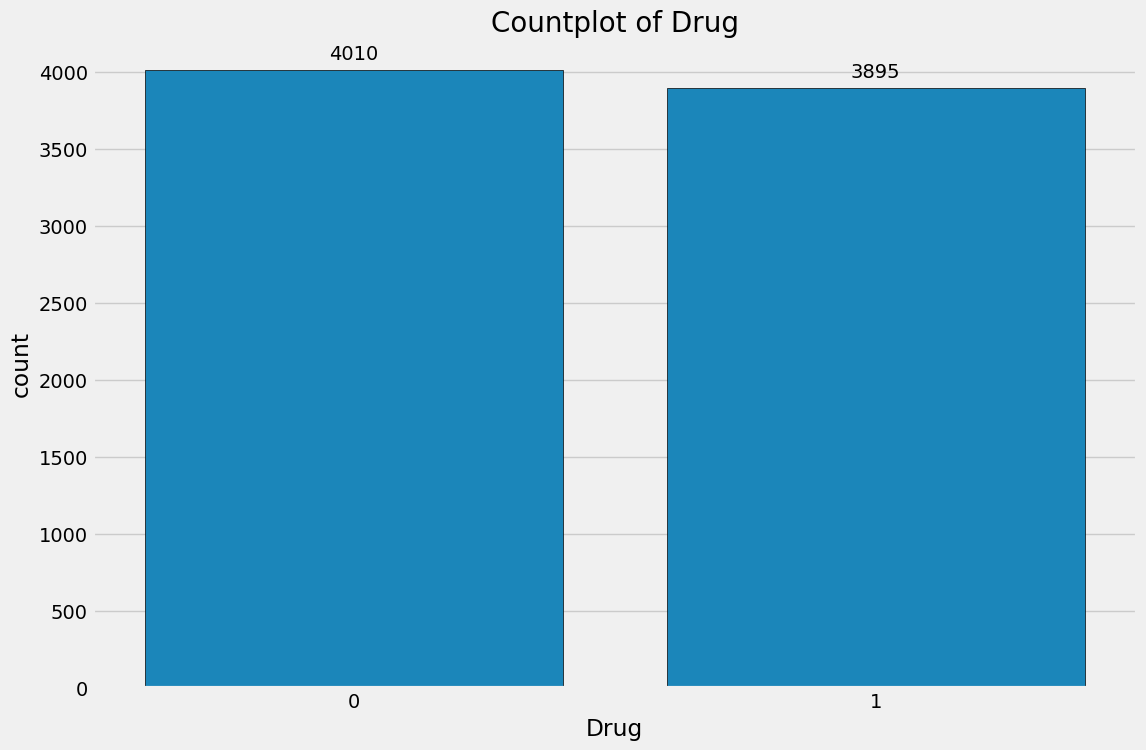

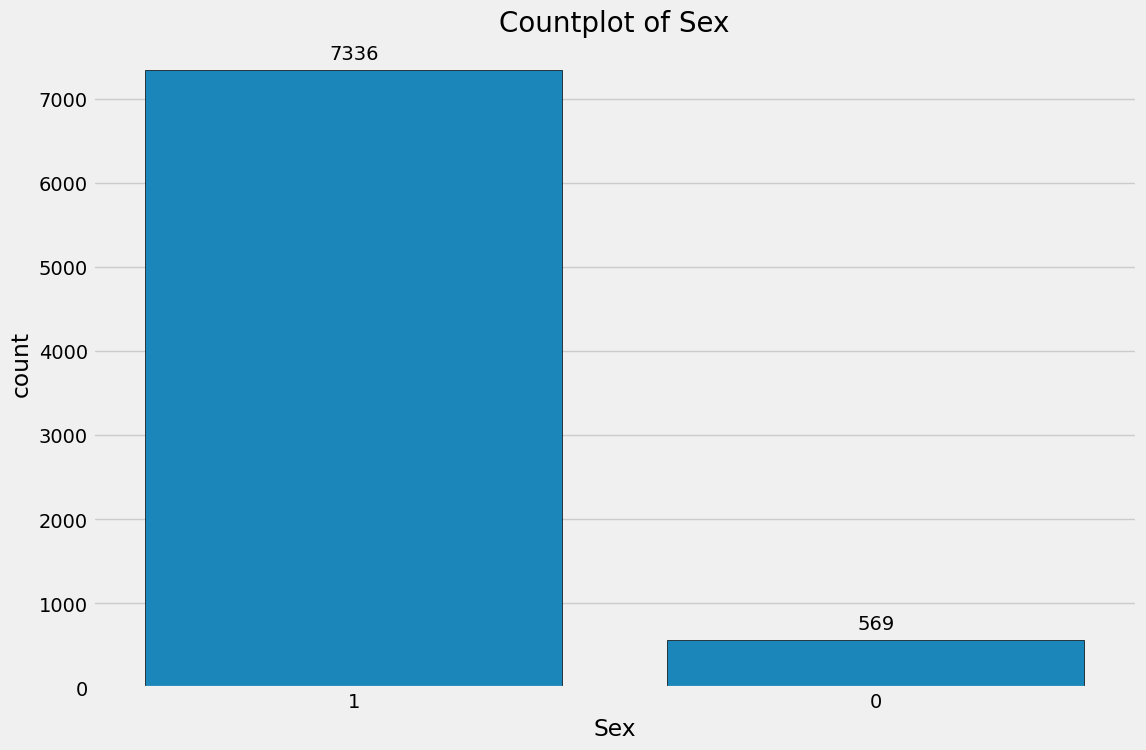

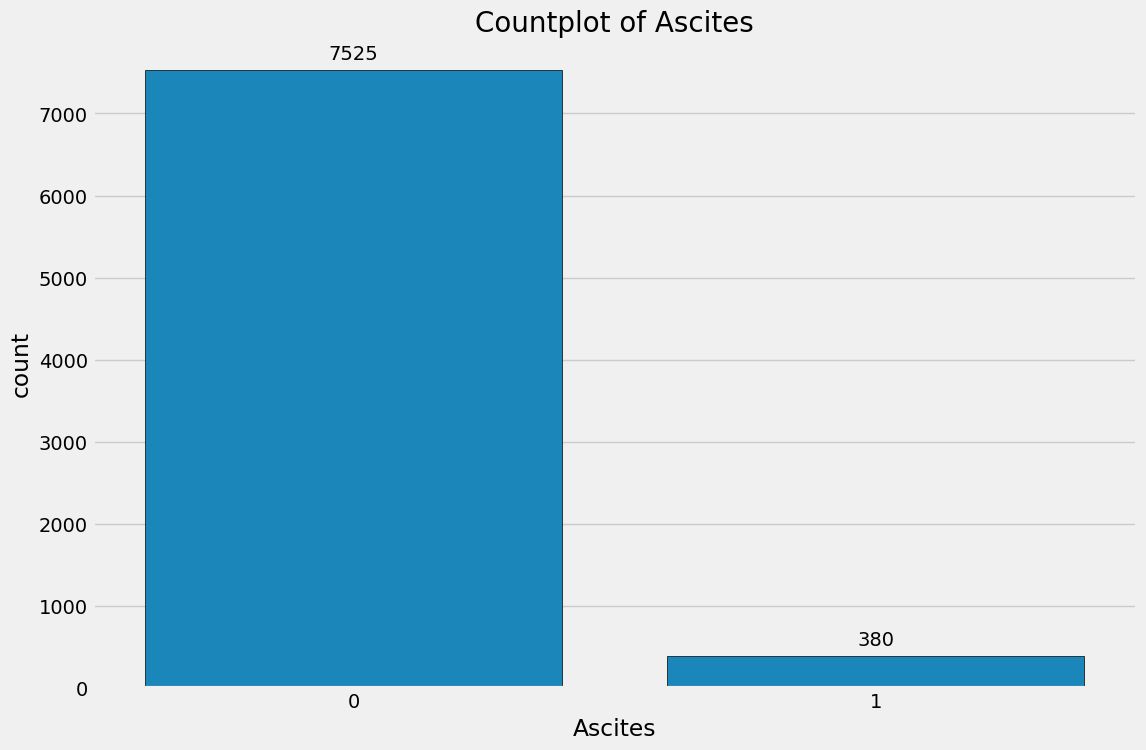

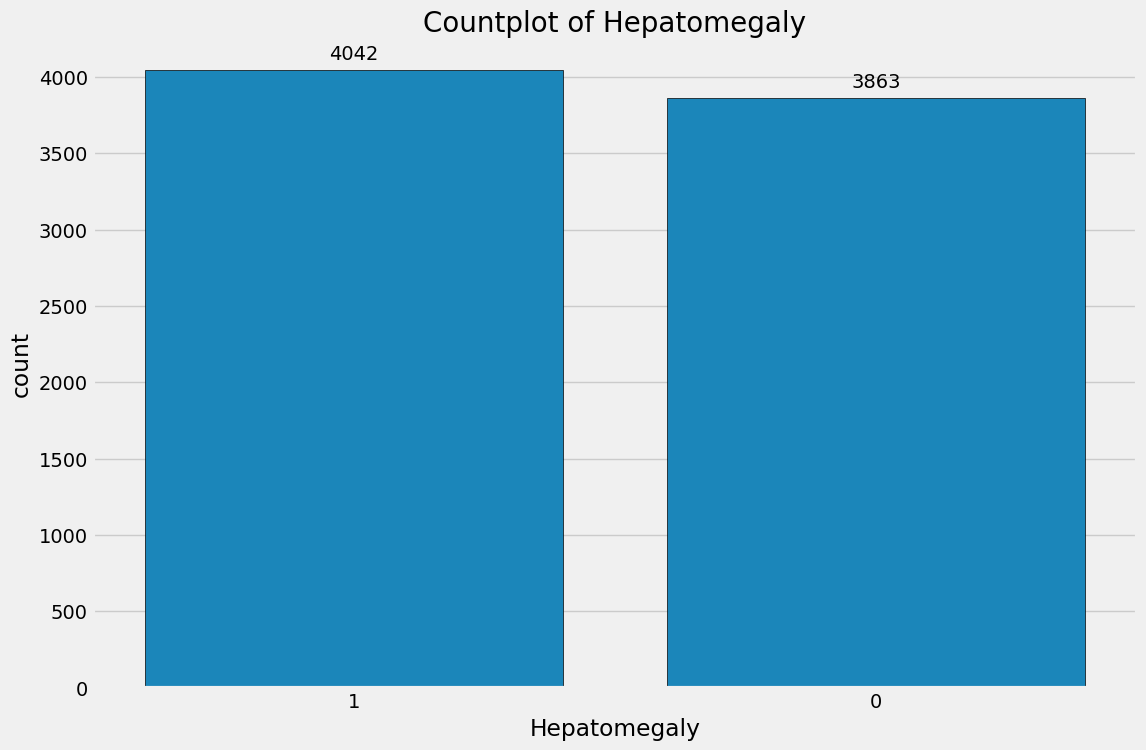

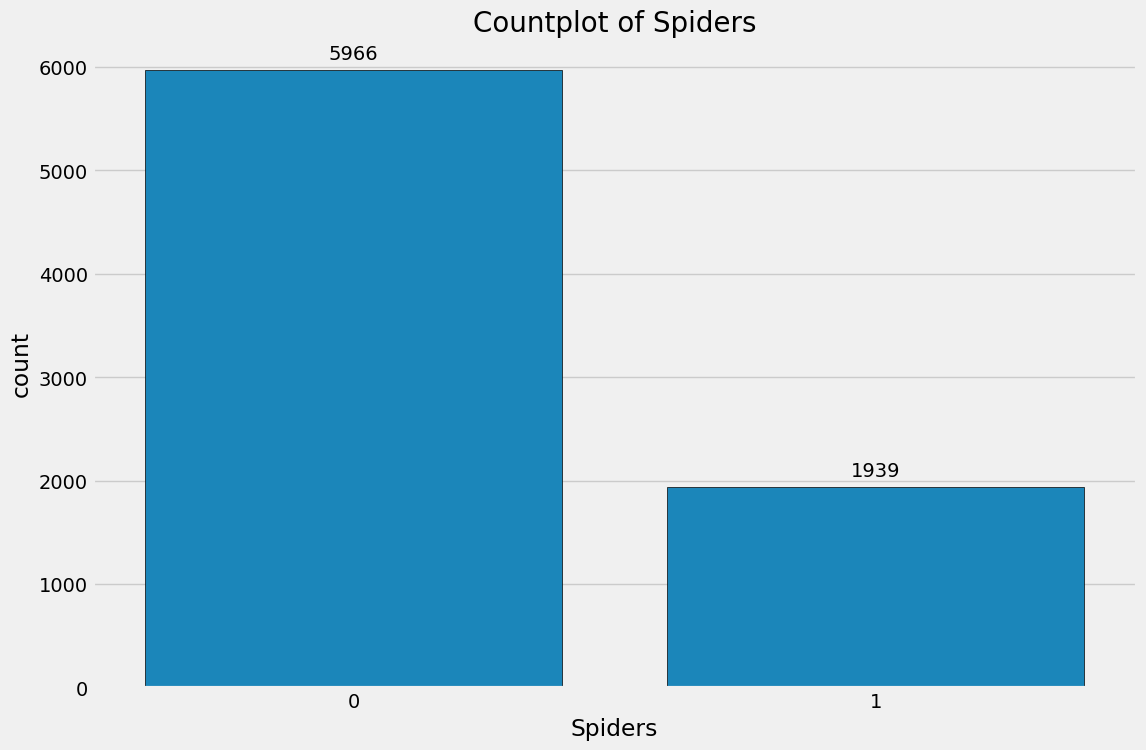

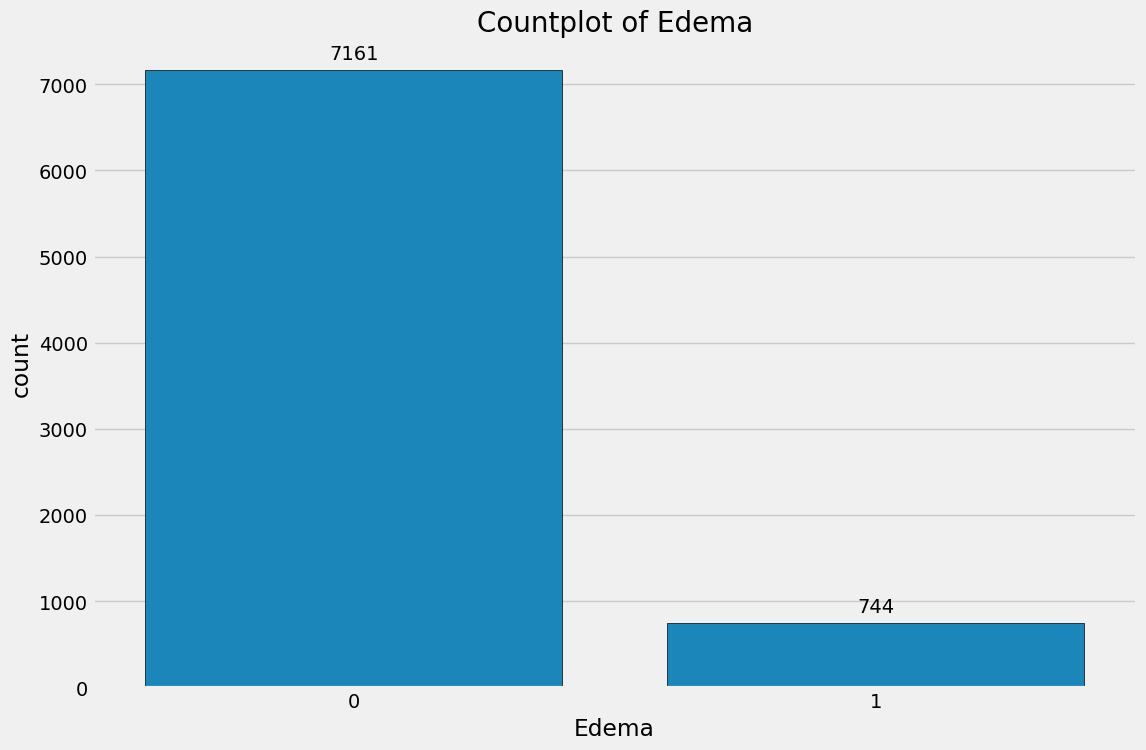

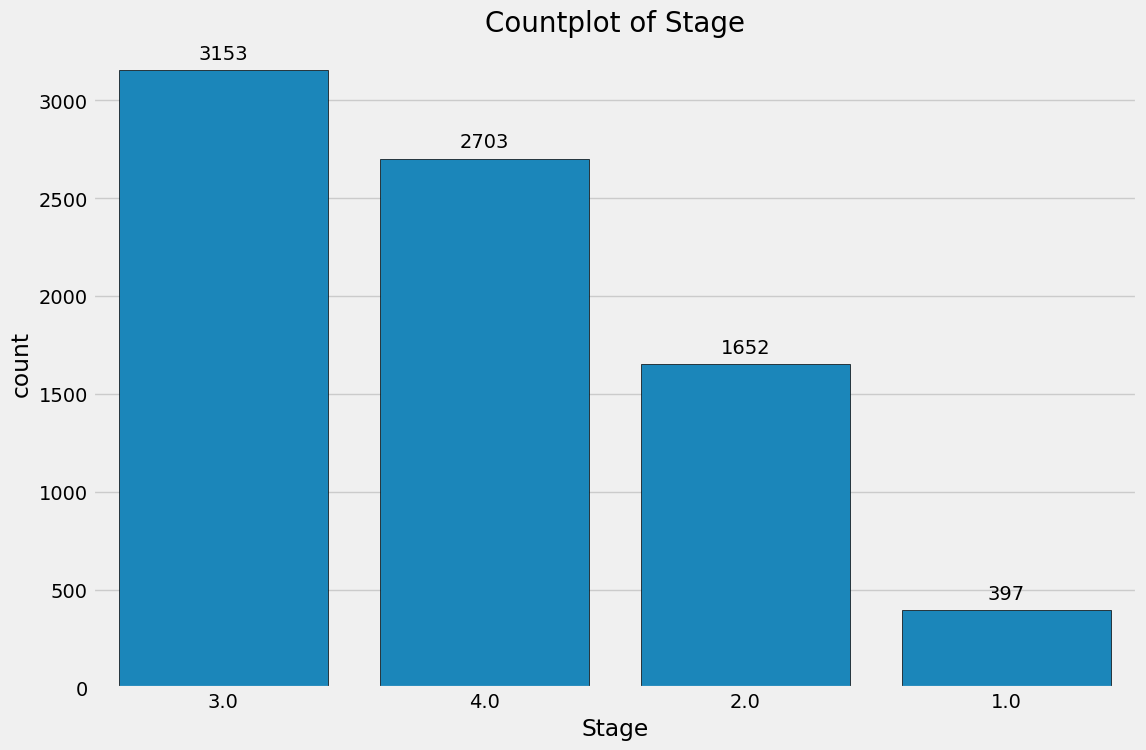

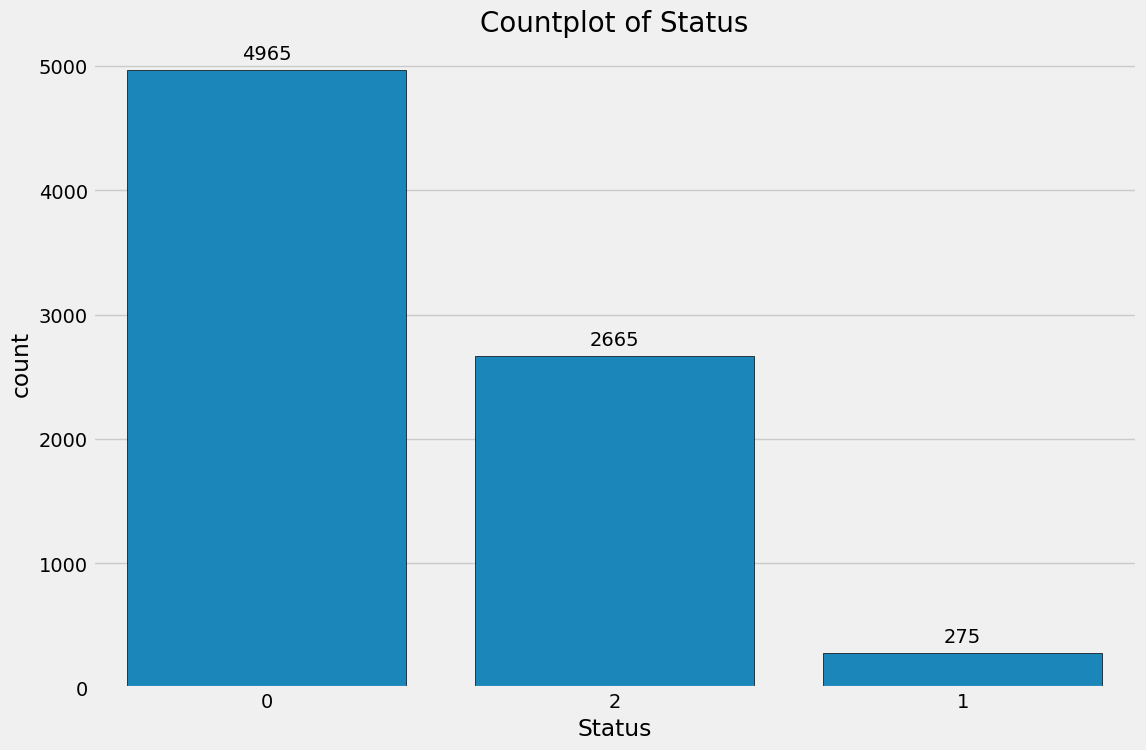

In [ ]:
fast_eda(parsed_data, target="Status")

In [ ]:
def remove_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return filtered_data

In [ ]:
def winsorize_this(col_data,q1,q2):
  lower_limit = col_data.quantile(q1)
  upper_limit = col_data.quantile(q2)
  winsorized_data = col_data.clip(lower=lower_limit, upper=upper_limit)
  return winsorized_data

In [ ]:
for col in ['Bilirubin','Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Prothrombin']:
  parsed_data[col] = winsorize_this(parsed_data[col],0.00,0.90)

In [ ]:
for col in ['Platelets']:
  parsed_data[col] = winsorize_this(parsed_data[col],0.00,0.95)

In [ ]:
for col in ['Albumin']:
  parsed_data[col] = winsorize_this(parsed_data[col],0.05,0.95)

In [ ]:
object_data = parsed_data.select_dtypes(include='object')
numeric_data = parsed_data.select_dtypes(exclude='object')

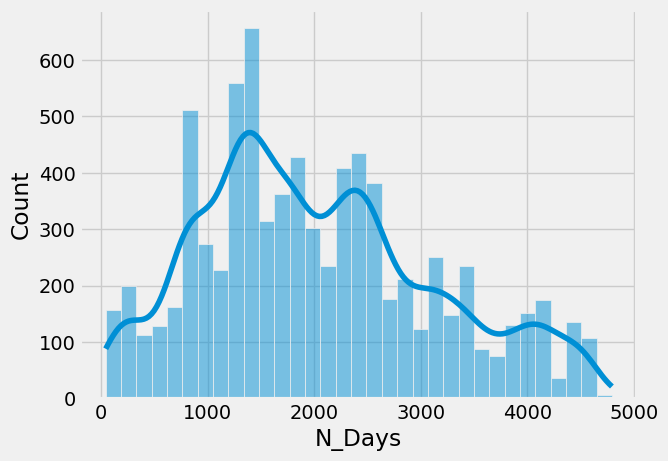

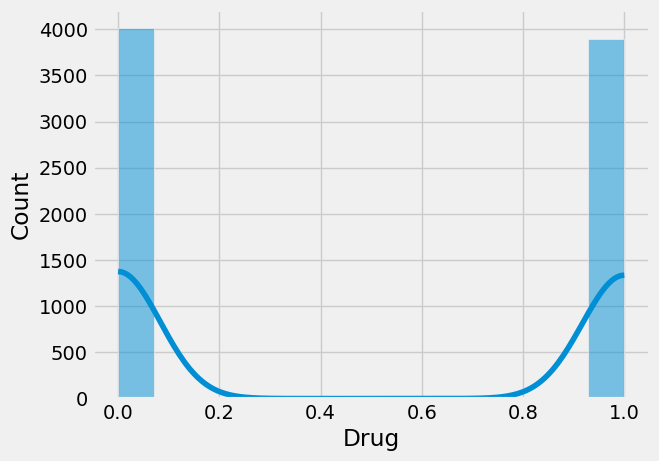

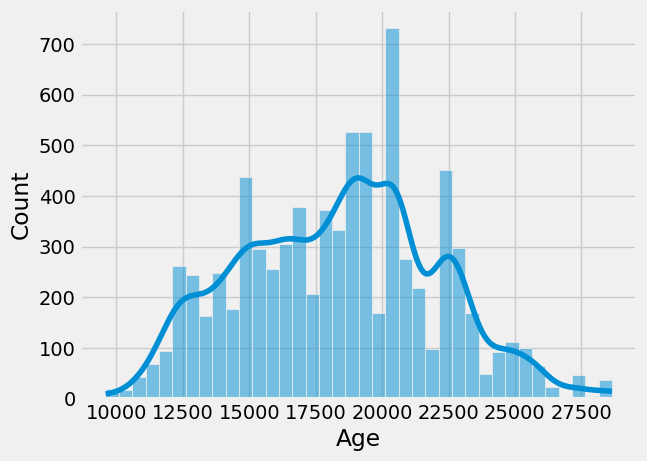

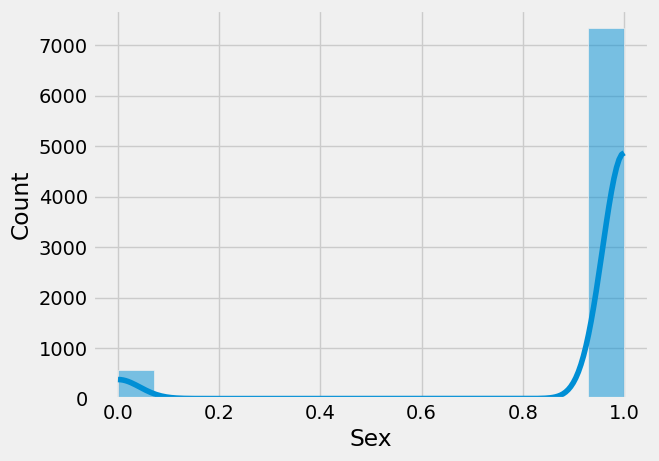

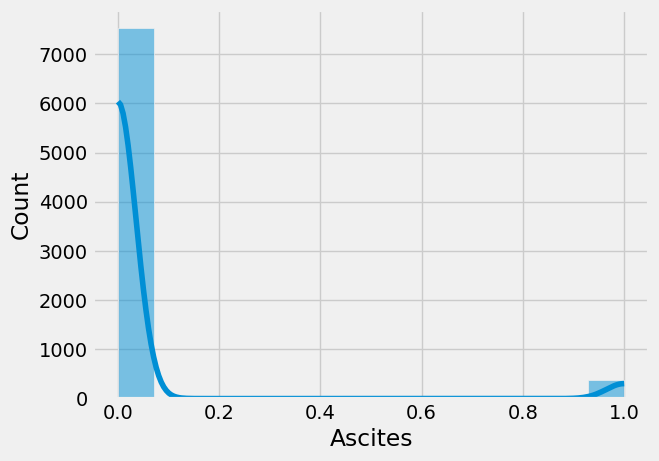

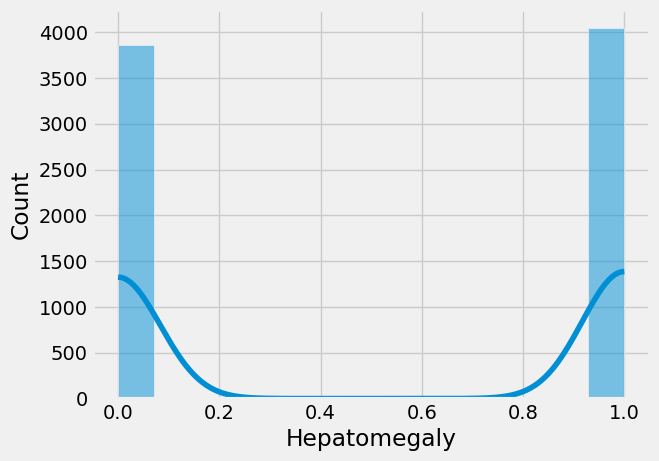

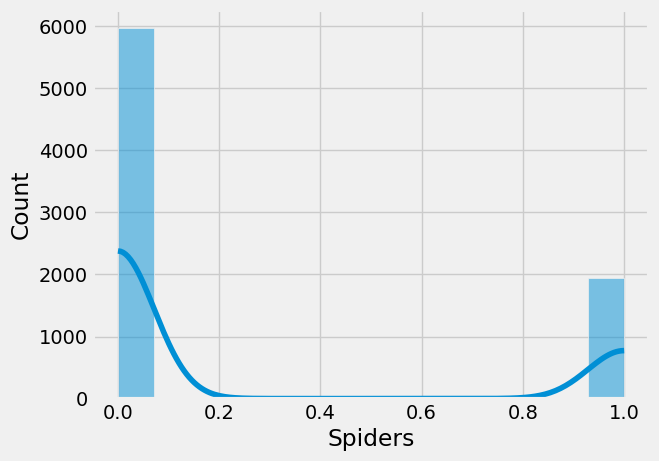

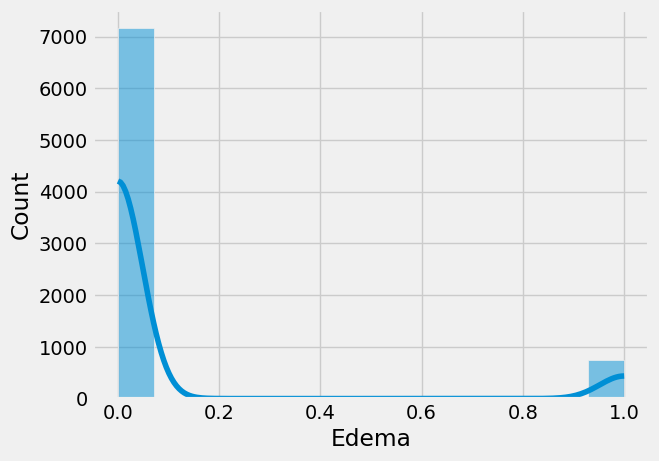

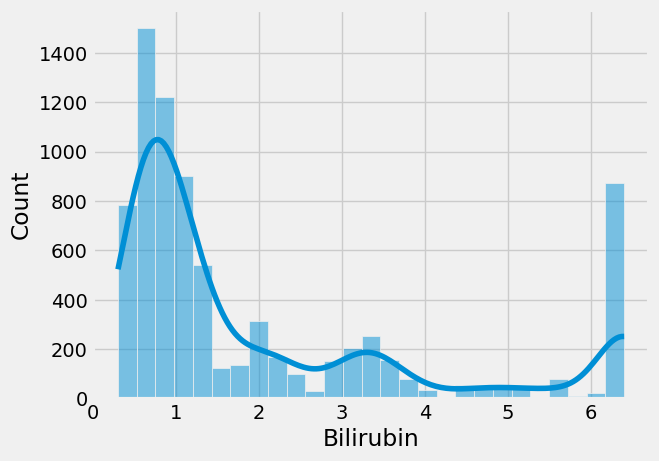

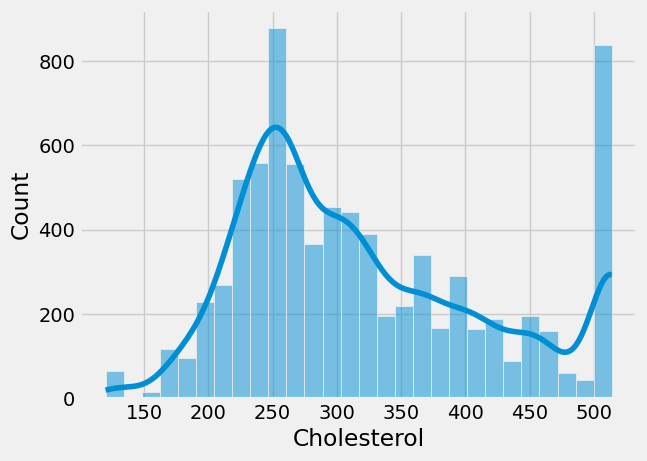

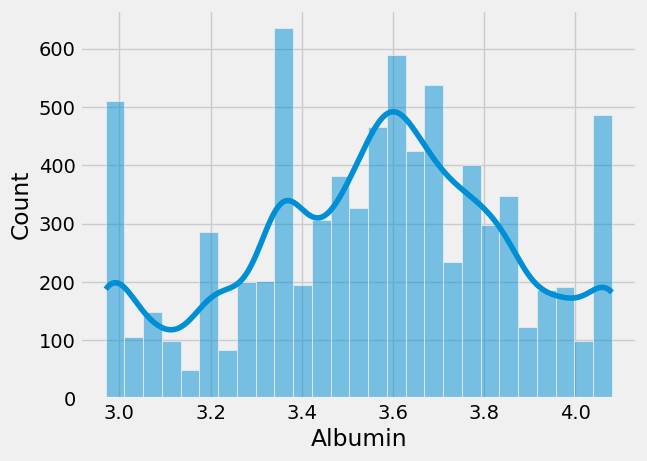

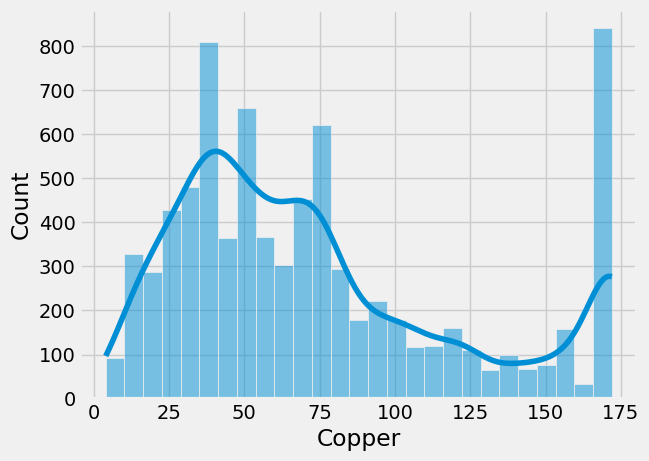

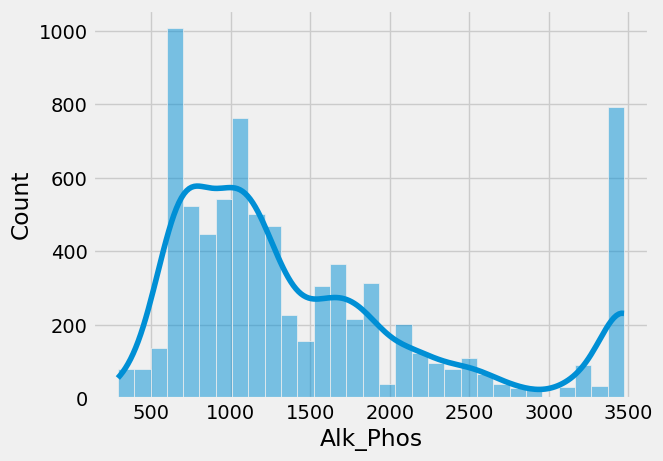

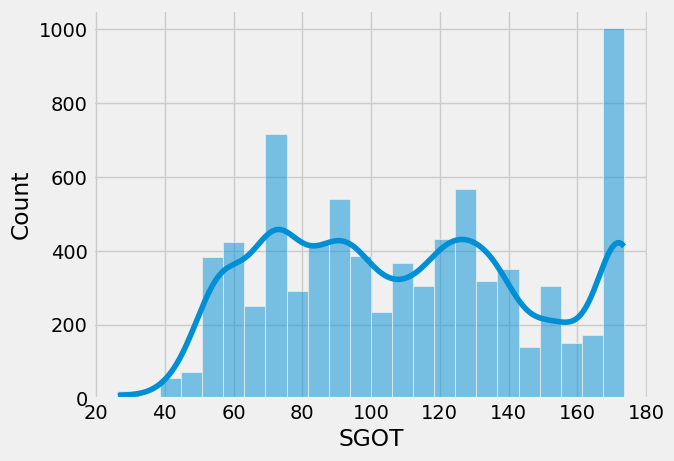

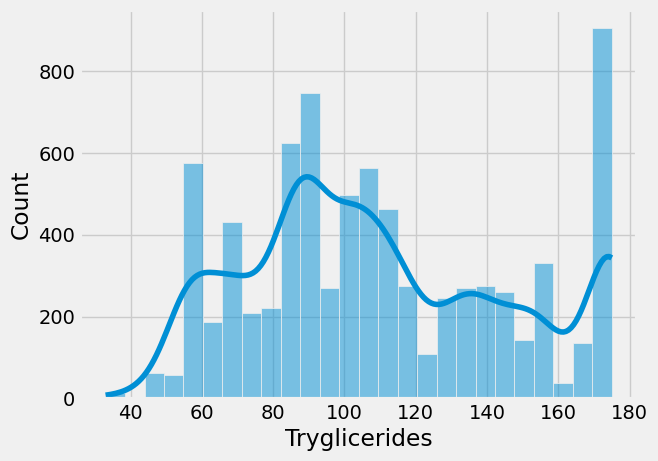

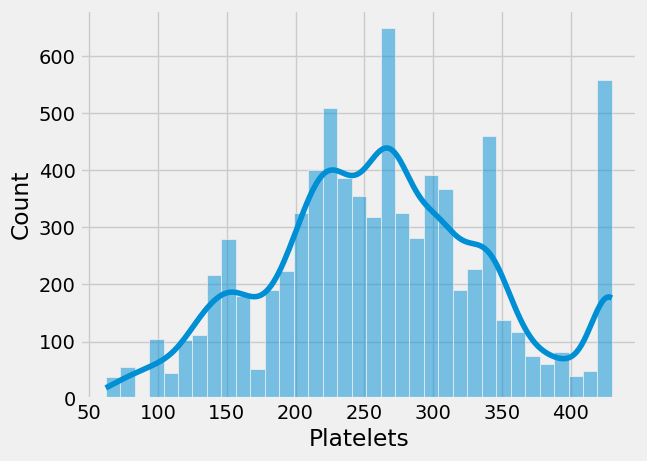

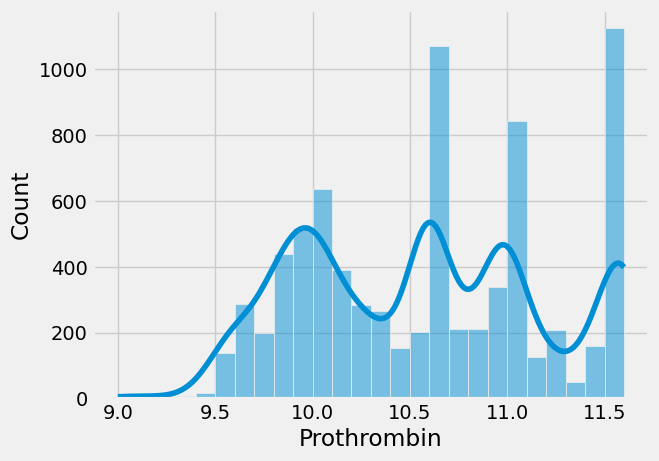

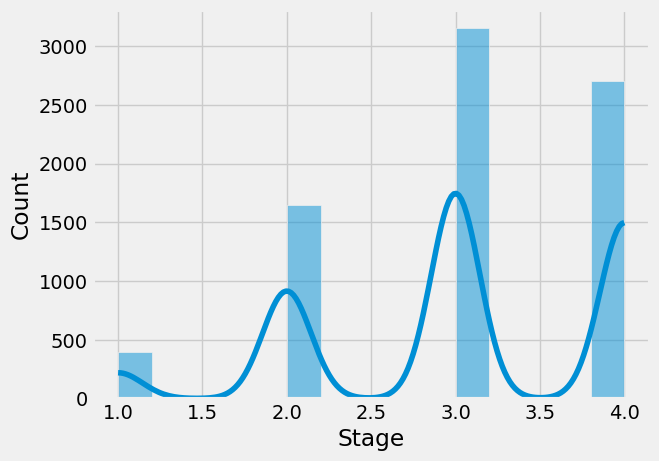

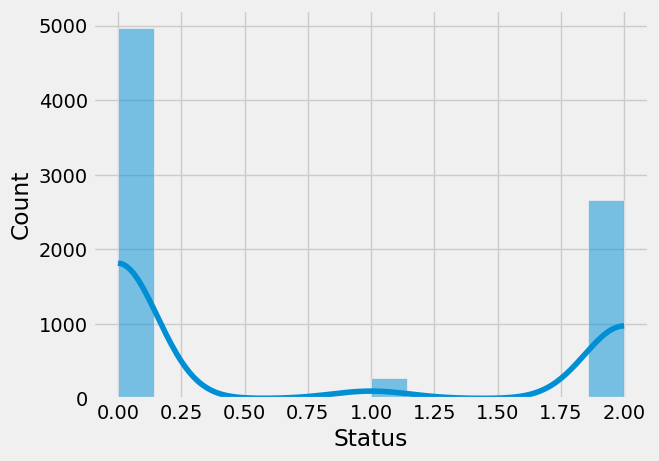

In [ ]:
for col in numeric_data.columns:
  plot_hist(numeric_data[col])

DataFrame Head:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     999     1  21532    0        0             0        0      0        2.3   
1    2574     0  19237    1        0             0        0      0        0.9   
2    3428     0  13727    1        0             1        1      1        3.3   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        316.0     3.35   172.0    1601.0  173.60           63.0      394.0   
1        364.0     3.54    63.0    1440.0  134.85           88.0      361.0   
2        299.0     3.55   131.0    1029.0  119.35           50.0      199.0   

   Prothrombin  Stage  Status  
0          9.7    3.0       2  
1         11.0    3.0       0  
2         11.6    4.0       2

DataFrame Tail:


N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
7902    1576     1  25873    1        0             0        1      1   
7903    3584     1  22960    0        0             1        0      0   
7904    1978     1  19237    1        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  Tryglicerides  \
7902        2.0        225.0     3.19    51.0     933.0  69.75           62.0   
7903        0.7        248.0     2.97    32.0    1003.0  57.35          118.0   
7904        0.7        256.0     3.23    22.0     645.0  74.40           85.0   

      Platelets  Prothrombin  Stage  Status  
7902      200.0         11.6    2.0       2  
7903      221.0         10.6    4.0       2  
7904      336.0         10.3    3.0       0

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(7905, 19)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   int64  
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   int64  
 4   Ascites        7905 non-null   int64  
 5   Hepatomegaly   7905 non-null   int64  
 6   Spiders        7905 non-null   int64  
 7   Edema          7905 non-null   int64  
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



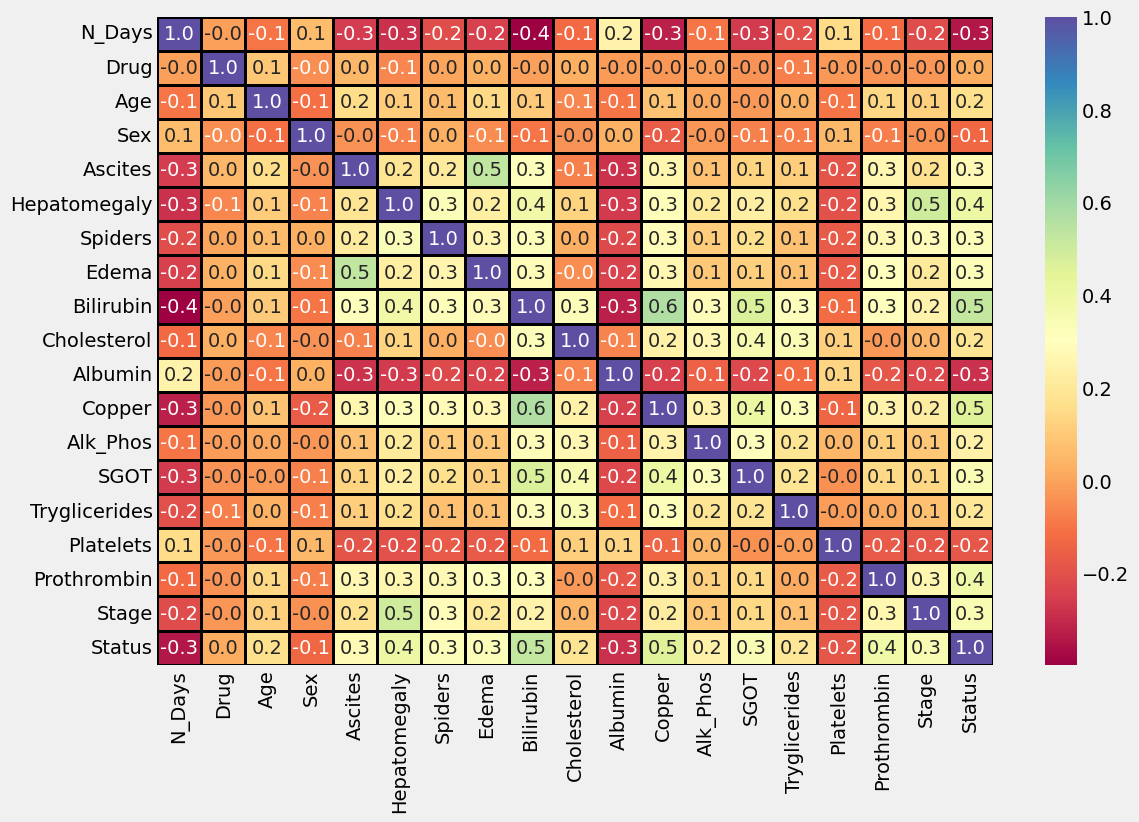

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



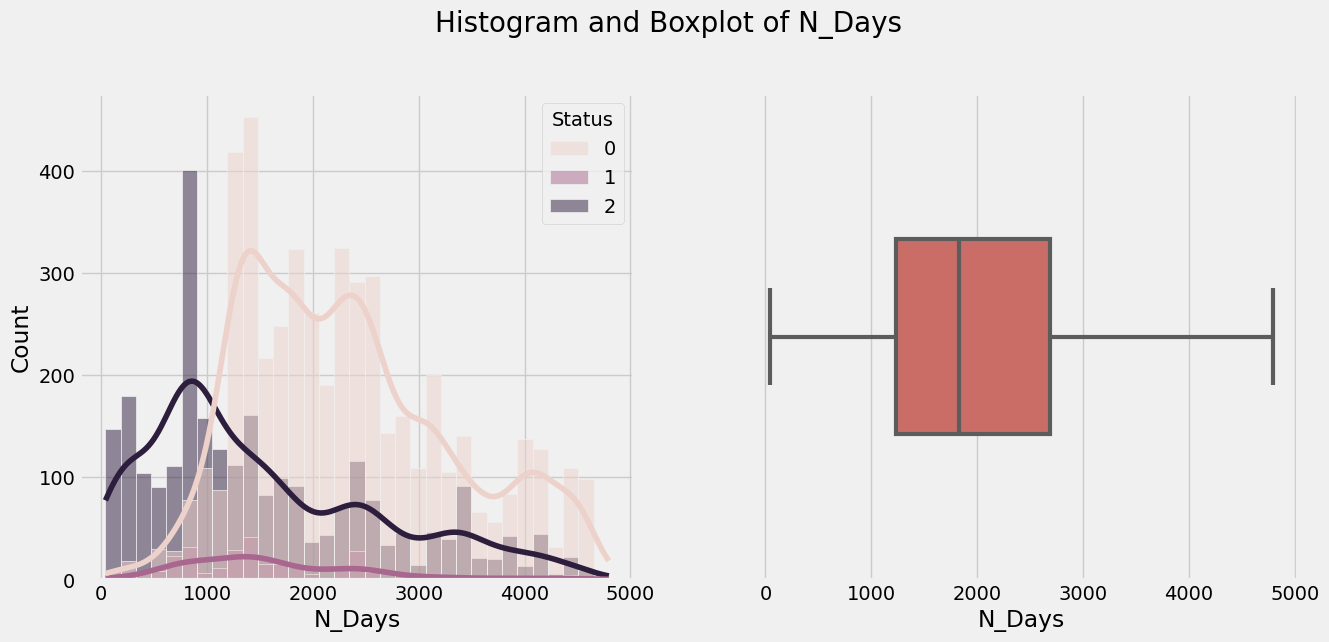

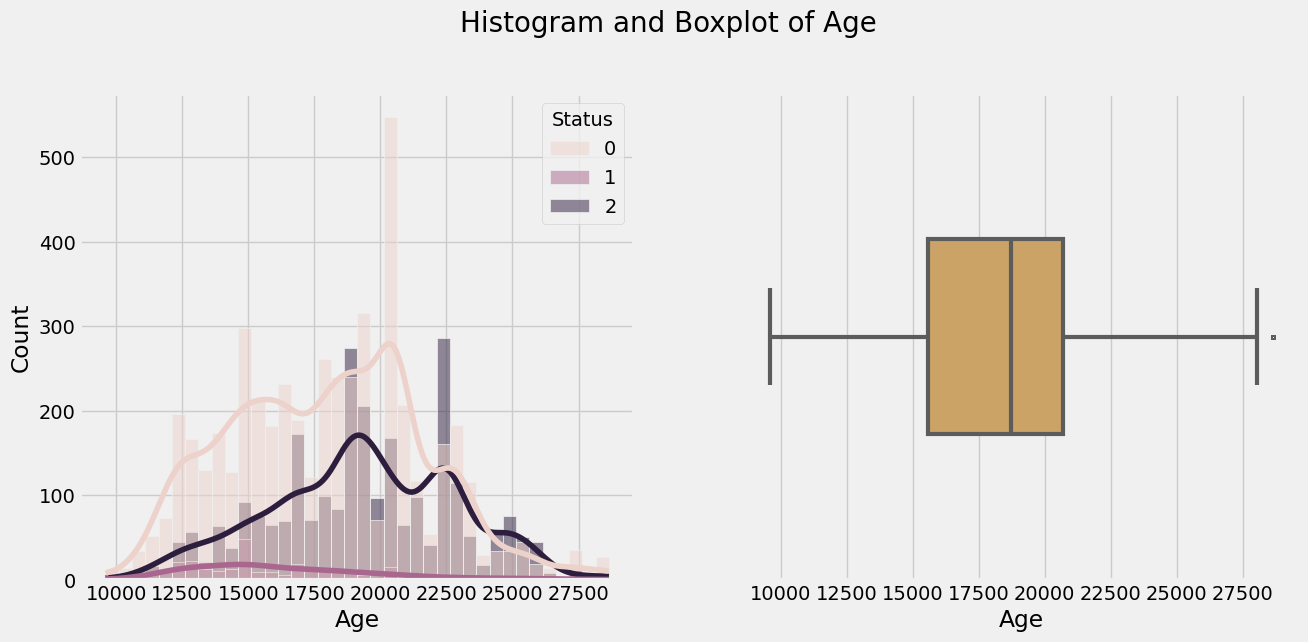

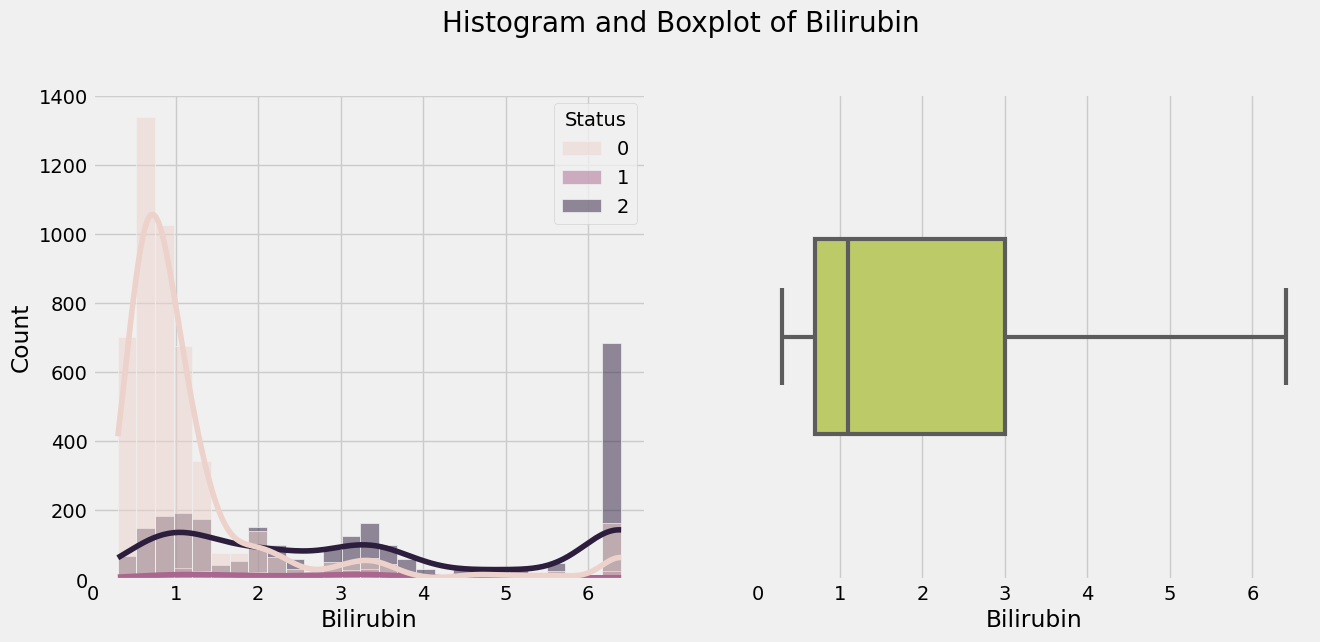

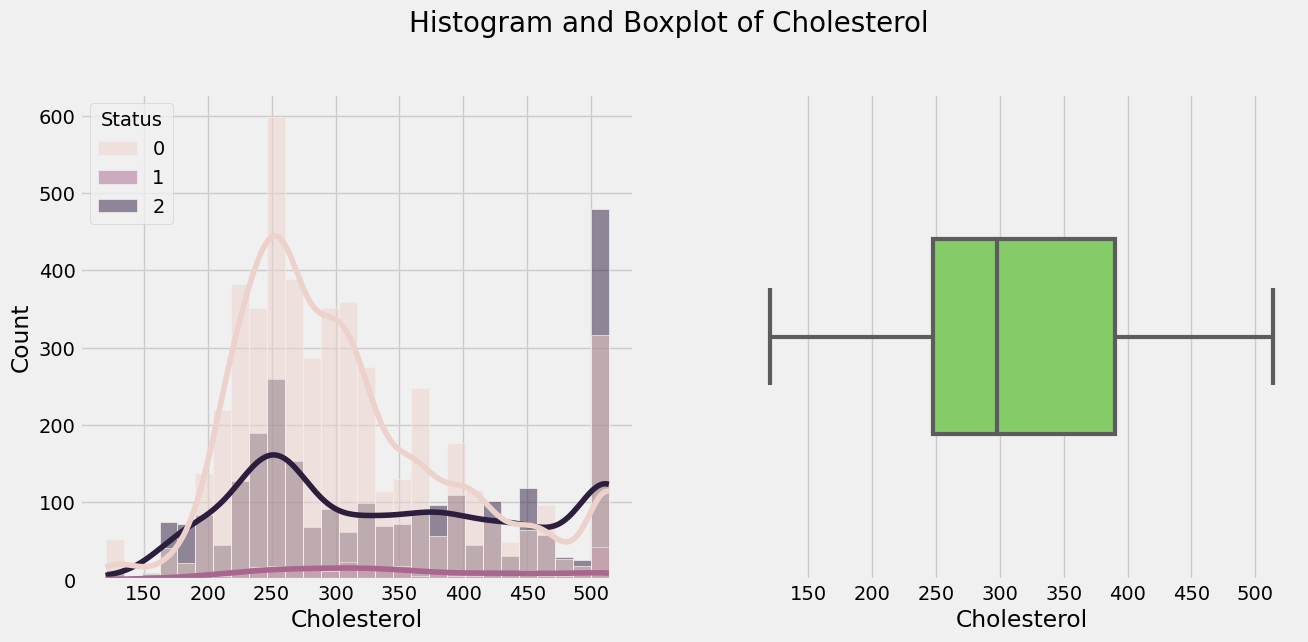

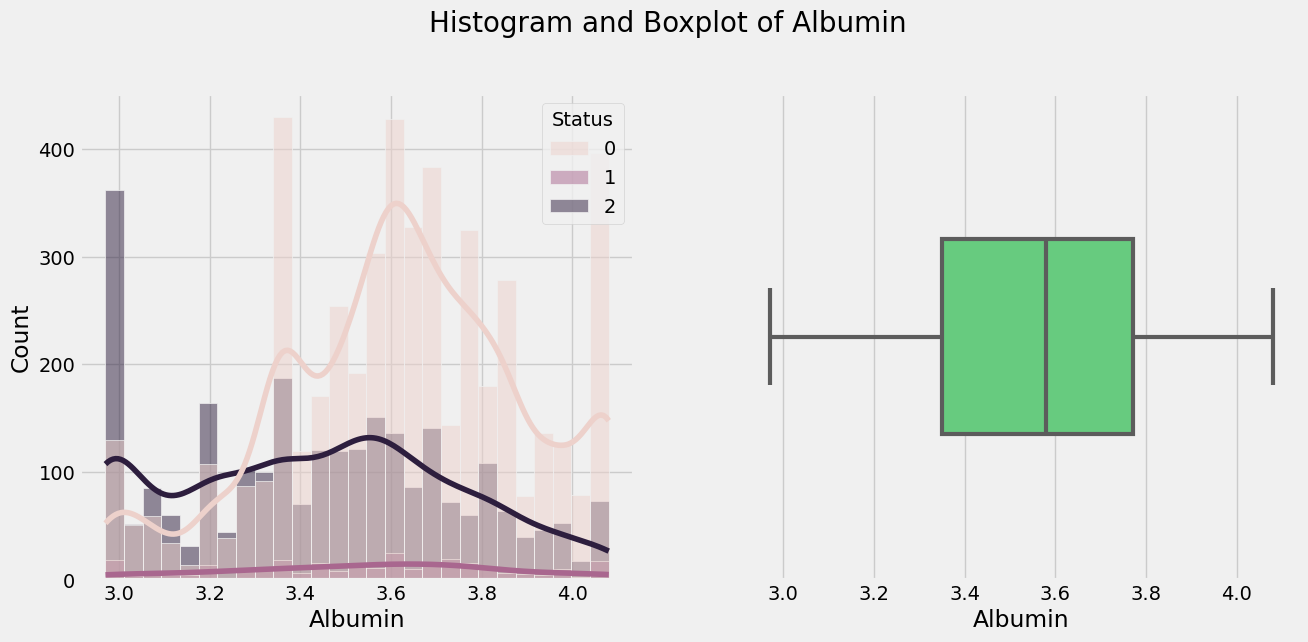

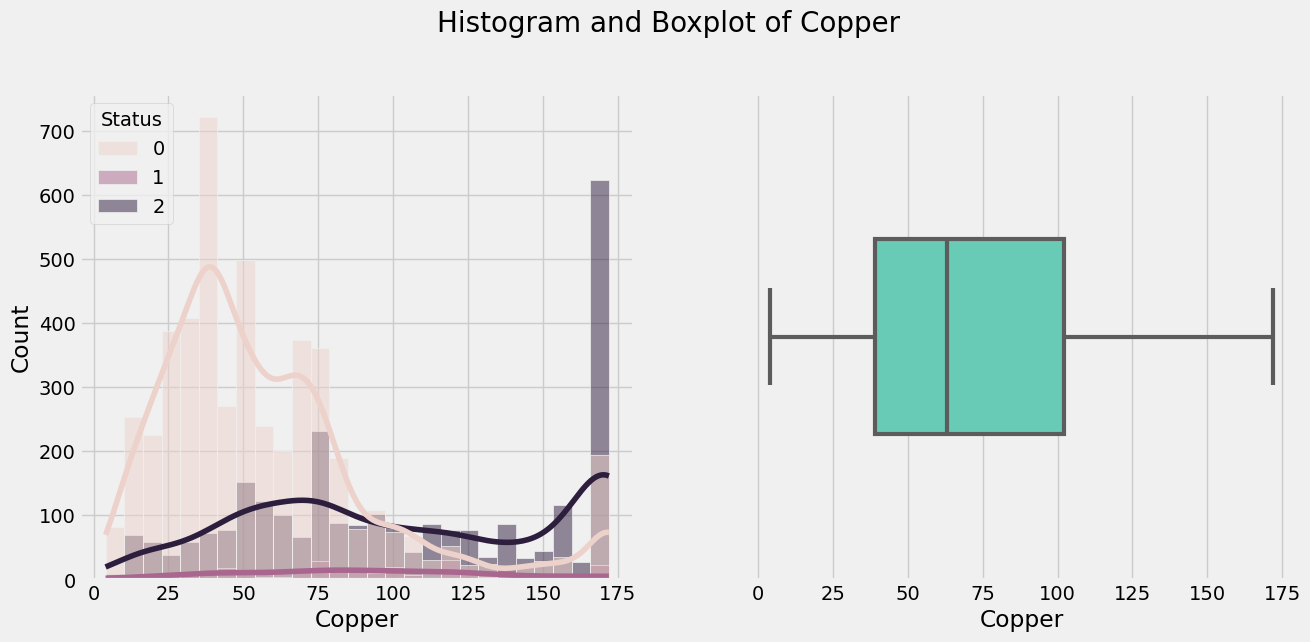

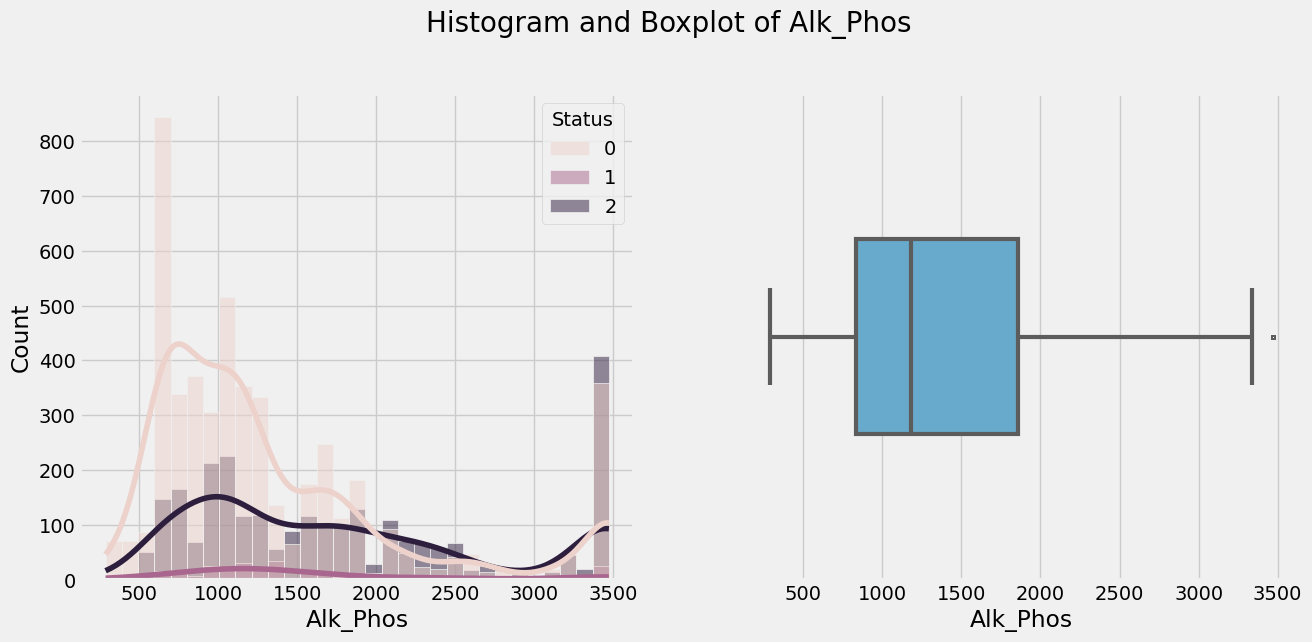

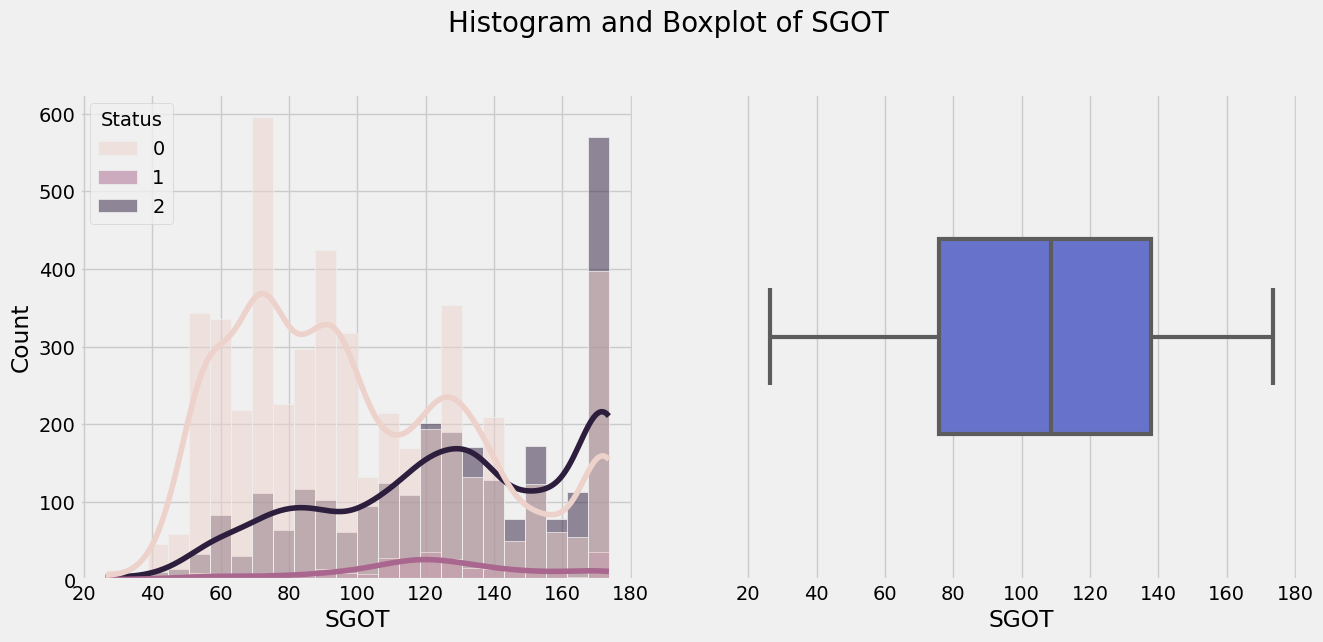

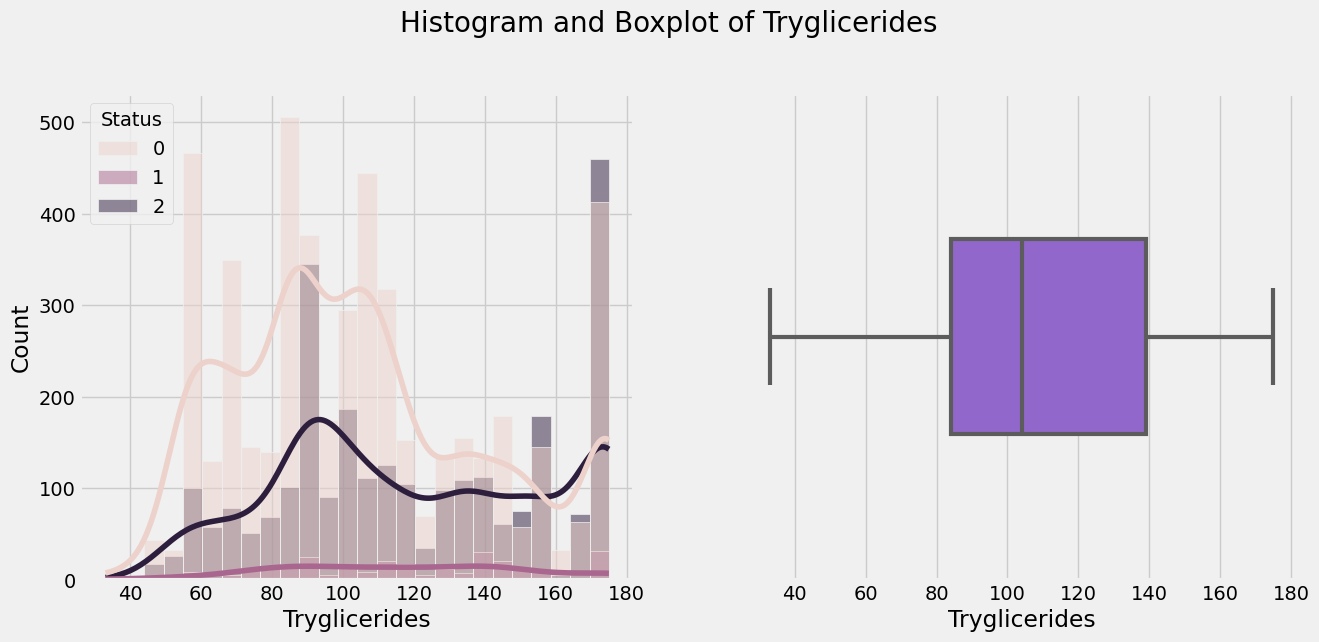

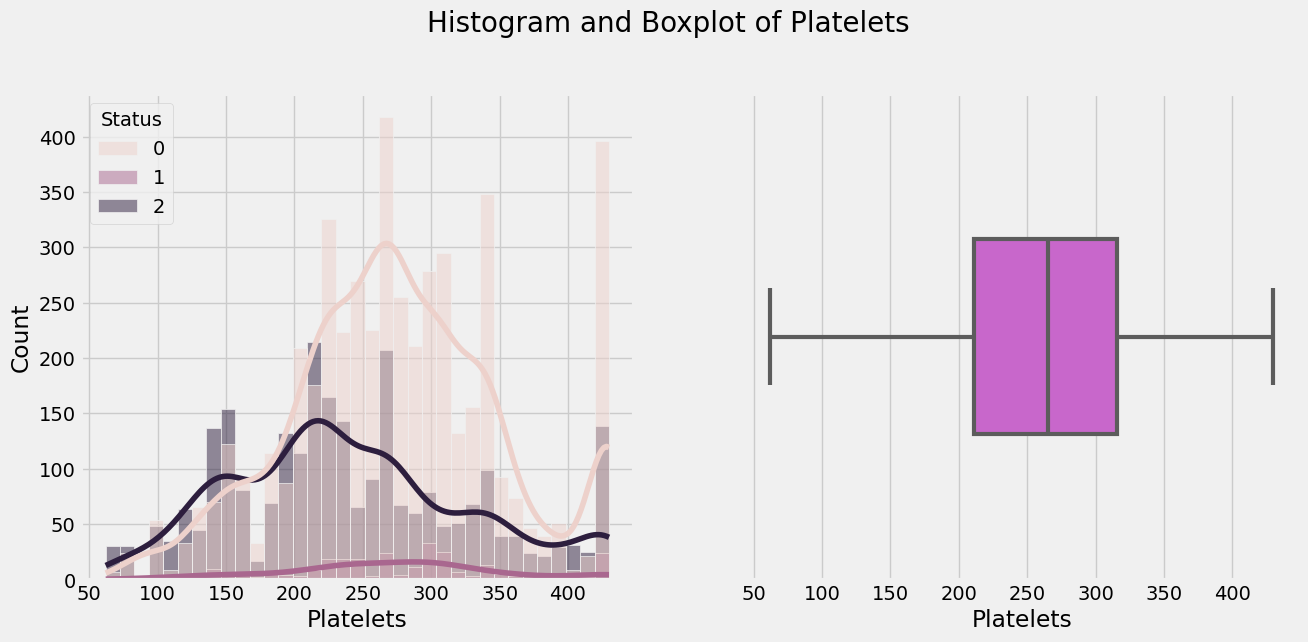

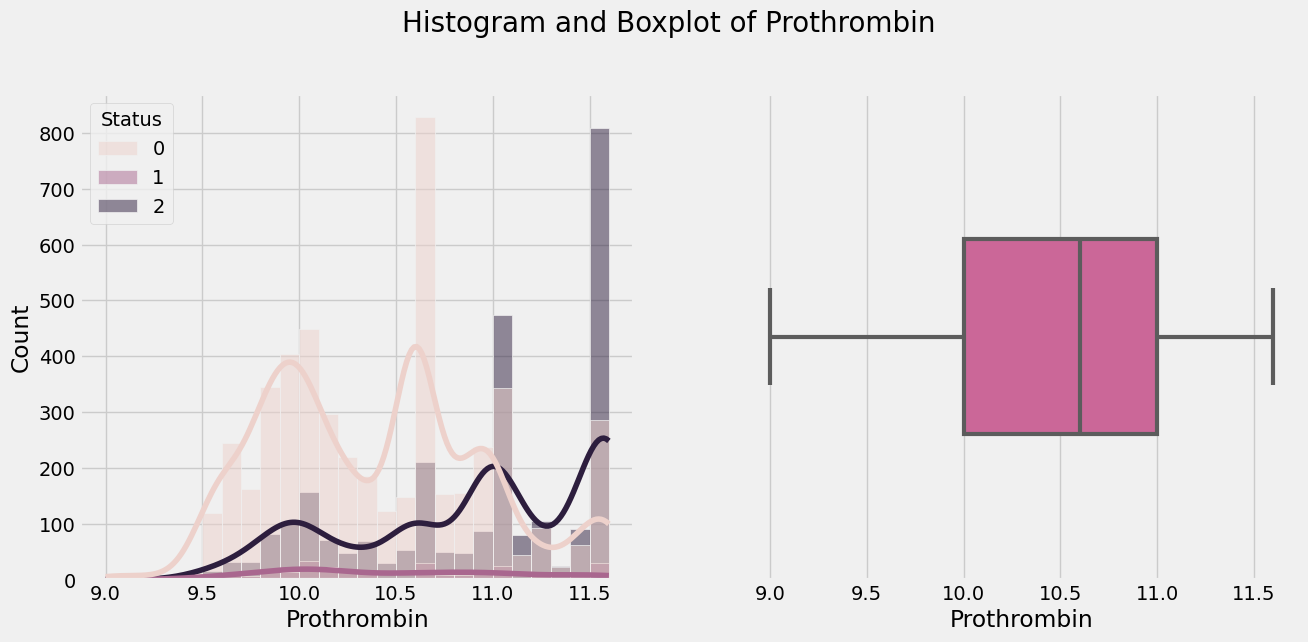

----------------------------------------------------------------------------------------------------
Countplot(s):



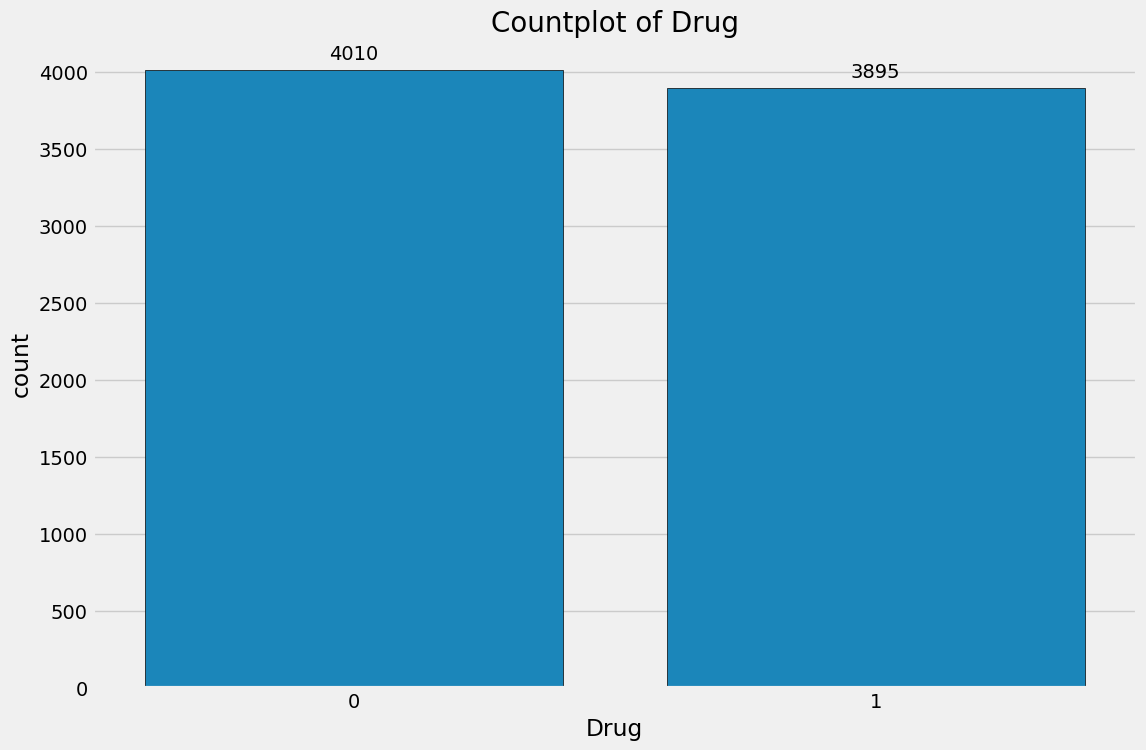

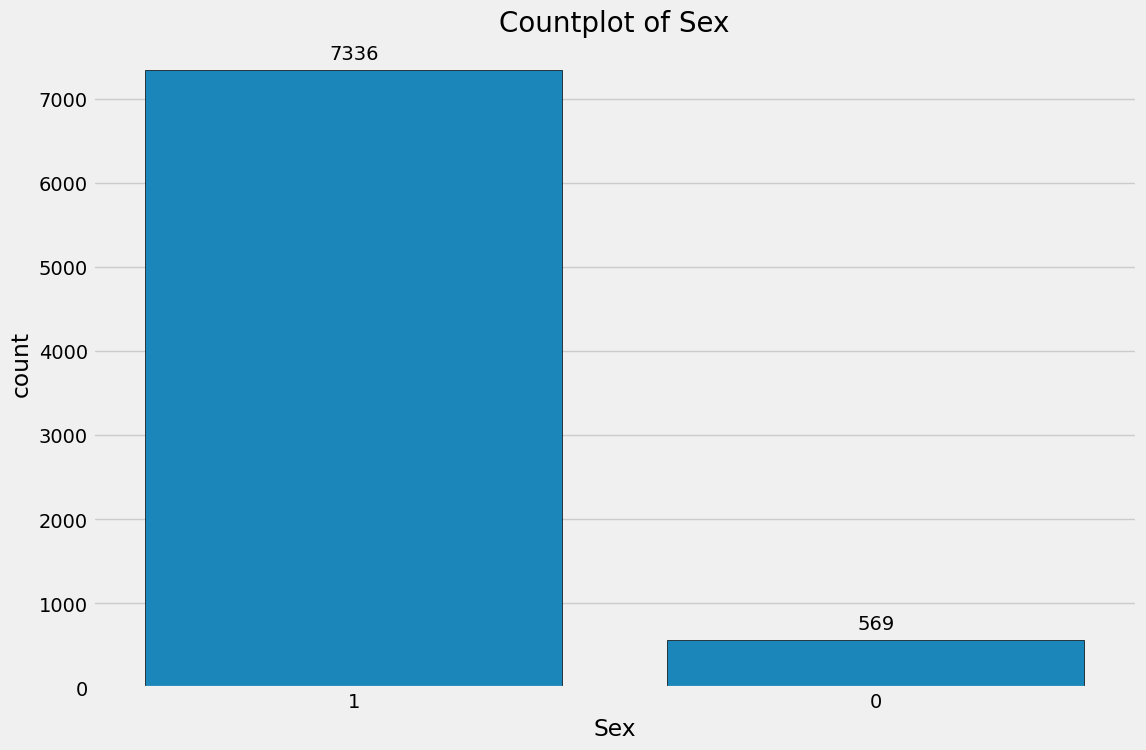

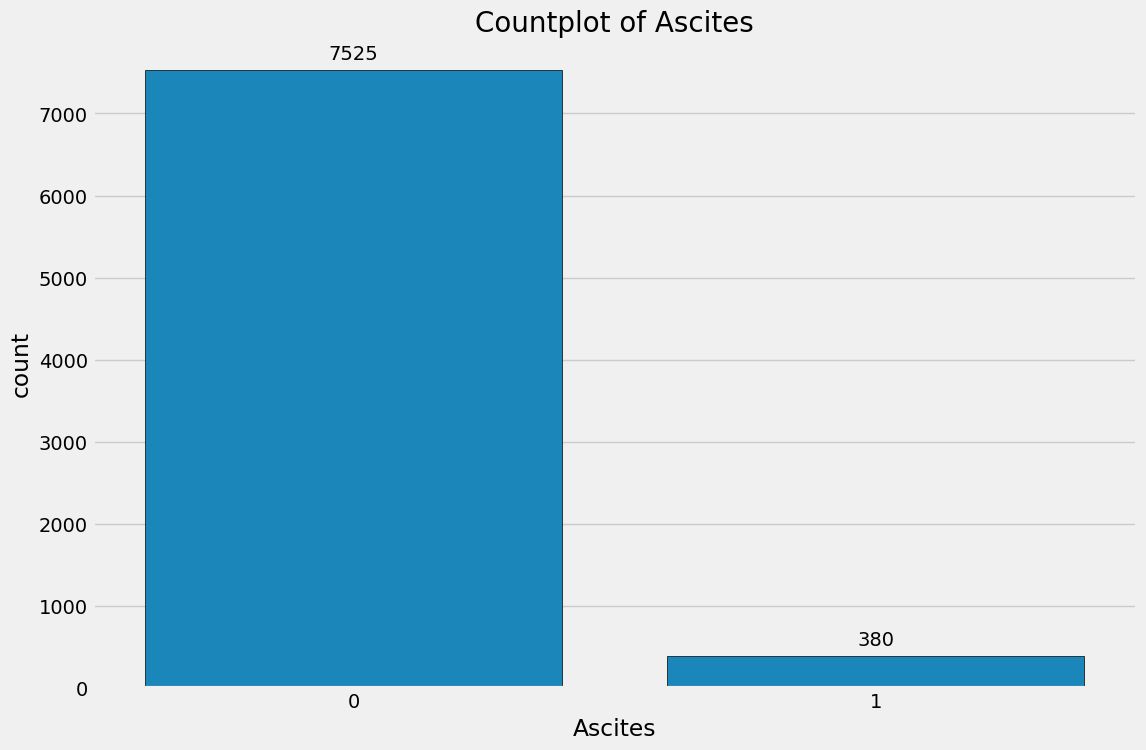

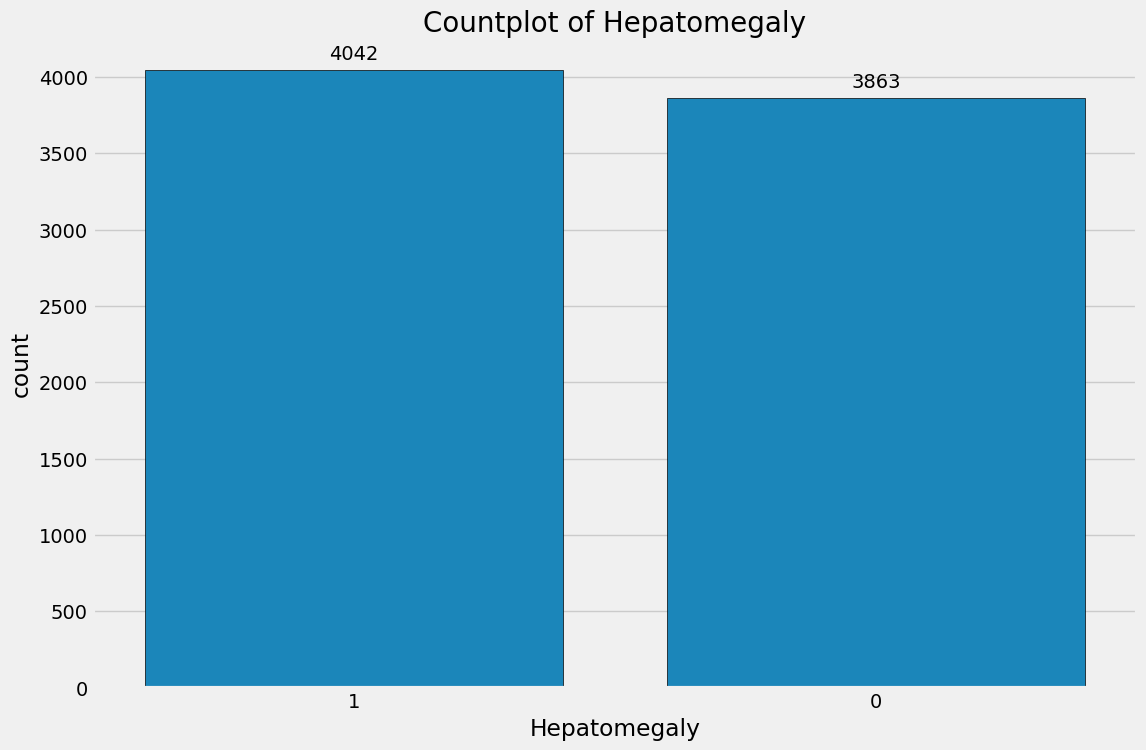

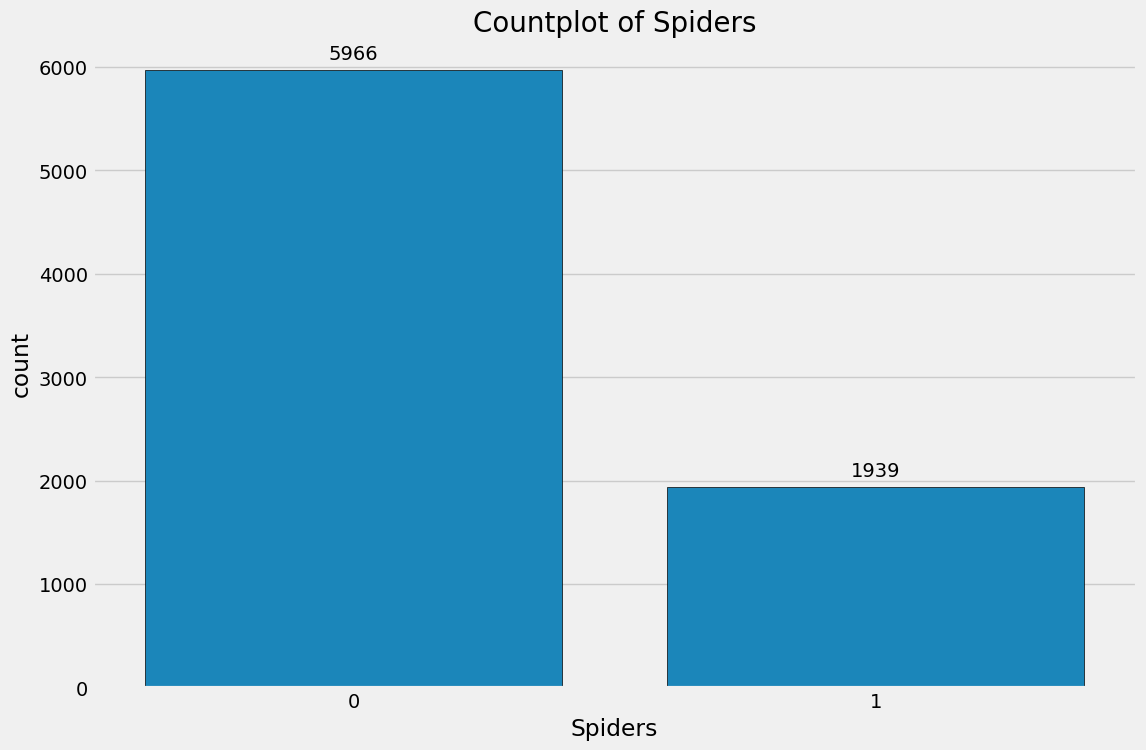

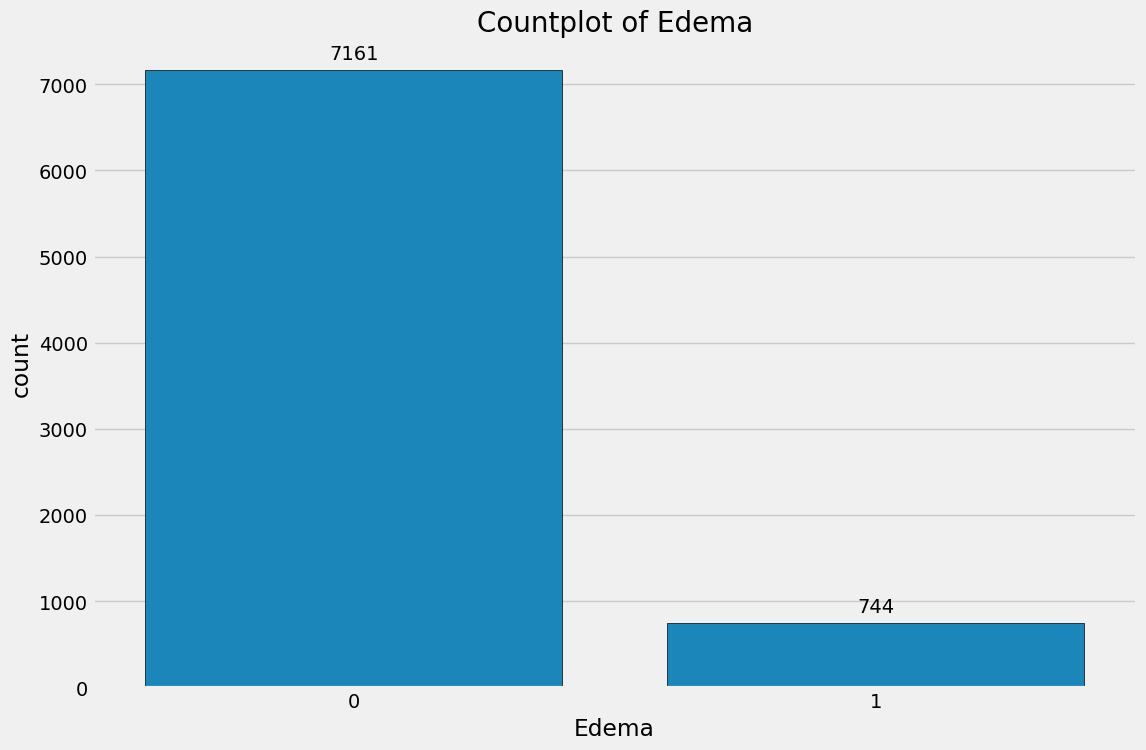

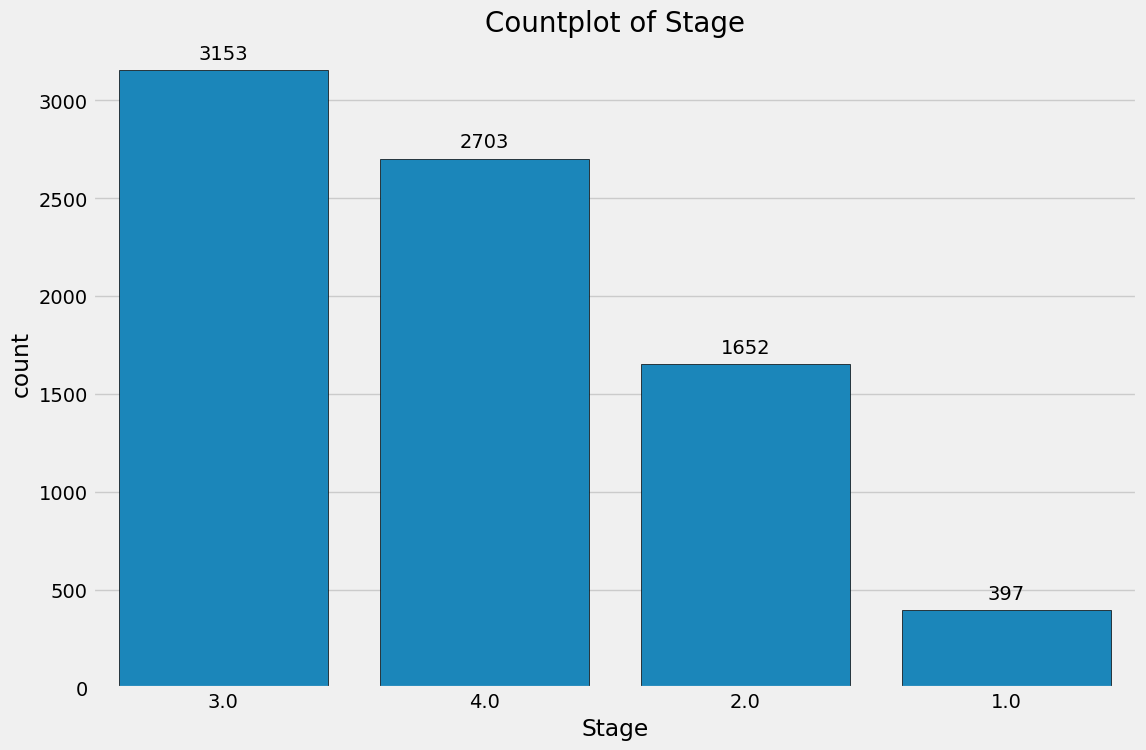

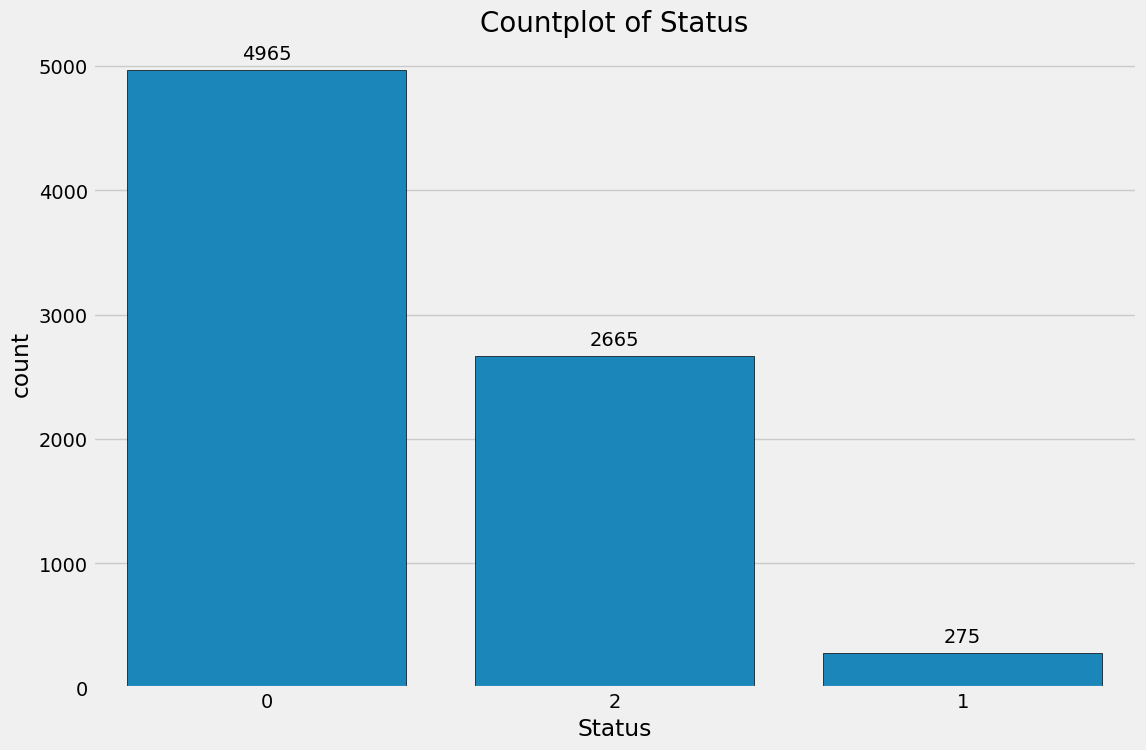

In [ ]:
fast_eda(parsed_data, target=TARGET)

In [ ]:
FEATURES

['N_Days',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [ ]:
def bilirubins_map(qty):
  if qty <= 1.2:
    return 0
  elif qty >= 1.2:
    return 1
  else:
    return 0

def cholestrol_map(qty):
  if qty < 200:
    return 0
  elif qty > 240:
    return 1
  else:
    return 0

def albumin_map(qty):
  if qty < 3.5:
    return 1
  elif 3.5 <= qty:
    return 0
  else:
    return 0

def copper_map(qty):
  if qty < 140:
    return 0
  elif qty >= 140:
    return 1
  else:
    return 0

def alkphos_map(qty):
  if qty < 1470:
    return 0
  elif qty >= 1470:
    return 1
  else:
    return 0

def SGOT_map(qty):
  if qty < 40:
    return 0
  elif qty >= 40:
    return 1
  else:
    return 0

def tryglicerides_map(qty):
  if qty < 150:
    return 0
  elif qty >= 150:
    return 1
  else:
    return 0

def platalets_map(qty):
  if qty < 150:
    return 1
  elif qty >= 150:
    return 0
  else:
    return 0

def prothrombin_map(qty):
  if qty < 13.5:
    return 0
  elif qty >= 13.5:
    return 1
  else:
    return 0

def transplanted_map(qty):
  if qty == 3 or qty == 4:
    return 1
  else:
    return 0

In [ ]:
def bins_data(data):
    data['bins_billirubins'] = data['Bilirubin'].apply(bilirubins_map)
    data['bins_cholestrol'] = data['Cholesterol'].apply(cholestrol_map)
    data['bins_albumin'] = data['Albumin'].apply(albumin_map)
    data['bins_copper'] = data['Copper'].apply(copper_map)
    data['bins_alkphos'] = data['Alk_Phos'].apply(alkphos_map)
    data['bins_SGOT'] = data['SGOT'].apply(SGOT_map)
    data['bins_tryglicerides'] = data['Tryglicerides'].apply(tryglicerides_map)
    data['bins_platalets'] = data['Platelets'].apply(platalets_map)
    data['bins_prothrombin'] = data['Prothrombin'].apply(prothrombin_map)
    data['bins_must_transplanted'] = data['Stage'].apply(transplanted_map)

    return data

In [ ]:
parsed_data = bins_data(parsed_data)

In [ ]:
parsed_data

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0        999     1  21532    0        0             0        0      0   
1       2574     0  19237    1        0             0        0      0   
2       3428     0  13727    1        0             1        1      1   
3       2576     0  18460    1        0             0        0      0   
4        788     0  16658    1        0             1        0      0   
...      ...   ...    ...  ...      ...           ...      ...    ...   
7900    1166     1  16839    1        0             0        0      0   
7901    1492     0  17031    1        0             1        0      0   
7902    1576     1  25873    1        0             0        1      1   
7903    3584     1  22960    0        0             1        0      0   
7904    1978     1  19237    1        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0           2.3        316.0     3.35   172.0    1601.0  173.60   
1           0.9        364.0     3.54    63.0    1440.0  134.85   
2           3.3        299.0     3.55   131.0    1029.0  119.35   
3           0.6        256.0     3.50    58.0    1653.0   71.30   
4           1.1        346.0     3.65    63.0    1181.0  125.55   
...         ...          ...      ...     ...       ...     ...   
7900        0.8        309.0     3.56    38.0    1629.0   79.05   
7901        0.9        260.0     3.43    62.0    1440.0  142.00   
7902        2.0        225.0     3.19    51.0     933.0   69.75   
7903        0.7        248.0     2.97    32.0    1003.0   57.35   
7904        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage  Status  bins_billirubins  \
0              63.0      394.0          9.7    3.0       2                 1   
1              88.0      361.0         11.0    3.0       0                 0   
2              50.0      199.0         11.6    4.0       2                 1   
3              96.0      269.0         10.7    3.0       0                 0   
4              96.0      298.0         10.6    4.0       0                 0   
...             ...        ...          ...    ...     ...               ...   
7900          175.0      344.0          9.9    2.0       0                 0   
7901           78.0      277.0         10.0    4.0       0                 0   
7902           62.0      200.0         11.6    2.0       2                 1   
7903          118.0      221.0         10.6    4.0       2                 0   
7904           85.0      336.0         10.3    3.0       0                 0   

      bins_cholestrol  bins_albumin  bins_copper  bins_alkphos  bins_SGOT  \
0                   1             1            1             1          1   
1                   1             0            0             0          1   
2                   1             0            0             0          1   
3                   1             0            0             1          1   
4                   1             0            0             0          1   
...               ...           ...          ...           ...        ...   
7900                1             0            0             1          1   
7901                1             1            0             0          1   
7902                0             1            0             0          1   
7903                1             1            0             0          1   
7904                1             1            0             0          1   

      bins_tryglicerides  bins_platalets  bins_prothrombin  \
0                      0               0                 0   
1                      0               0                 0   
2                      0               0                 0   
3                      0               0                 0   
4                      0               0                 0   
...                  ...             ...               ...   
7900

In [ ]:
parsed_data.describe()

N_Days         Drug           Age          Sex      Ascites  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   2030.173308     0.492726  18373.146490     0.928020     0.048071   
std    1094.233744     0.499979   3679.958739     0.258471     0.213929   
min      41.000000     0.000000   9598.000000     0.000000     0.000000   
25%    1230.000000     0.000000  15574.000000     1.000000     0.000000   
50%    1831.000000     0.000000  18713.000000     1.000000     0.000000   
75%    2689.000000     1.000000  20684.000000     1.000000     0.000000   
max    4795.000000     1.000000  28650.000000     1.000000     1.000000   

       Hepatomegaly      Spiders        Edema    Bilirubin  Cholesterol  \
count   7905.000000  7905.000000  7905.000000  7905.000000  7905.000000   
mean       0.511322     0.245288     0.094118     2.031727   322.351803   
std        0.499903     0.430285     0.292011     1.920079    98.214700   
min        0.000000     0.000000     0.000000     0.300000   120.000000   
25%        0.000000     0.000000     0.000000     0.700000   248.000000   
50%        1.000000     0.000000     0.000000     1.100000   298.000000   
75%        1.000000     0.000000     0.000000     3.000000   390.000000   
max        1.000000     1.000000     1.000000     6.400000   514.000000   

           Albumin       Copper     Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000  7905.000000  7905.000000    7905.000000   
mean      3.555784    74.687287  1496.151423   110.553237     110.103732   
std       0.296318    47.932923   881.933198    38.465733      36.779762   
min       2.970000     4.000000   289.000000    26.350000      33.000000   
25%       3.350000    39.000000   834.000000    75.950000      84.000000   
50%       3.580000    63.000000  1181.000000   108.500000     104.000000   
75%       3.770000   102.000000  1857.000000   137.950000     139.000000   
max       4.080000   172.000000  3472.000000   173.600000     175.000000   

         Platelets  Prothrombin        Stage       Status  bins_billirubins  \
count  7905.000000  7905.000000  7905.000000  7905.000000       7905.000000   
mean    263.293738    10.565718     3.032511     0.709045          0.442631   
std      82.822080     0.627385     0.866511     0.938439          0.496729   
min      62.000000     9.000000     1.000000     0.000000          0.000000   
25%     211.000000    10.000000     2.000000     0.000000          0.000000   
50%     265.000000    10.600000     3.000000     0.000000          0.000000   
75%     316.000000    11.000000     4.000000     2.000000          1.000000   
max     430.000000    11.600000     4.000000     2.000000          1.000000   

       bins_cholestrol  bins_albumin  bins_copper  bins_alkphos    bins_SGOT  \
count      7905.000000   7905.000000  7905.000000   7905.000000  7905.000000   
mean          0.796458      0.376344     0.155471      0.383428     0.997470   
std           0.402658      0.484499     0.362376      0.486252     0.050239   
min           0.000000      0.000000     0.000000      0.000000     0.000000   
25%           1.000000      0.000000     0.000000      0.000000     1.000000   
50%           1.000000      0.000000     0.000000      0.000000     1.000000   
75%           1.000000      1.000000     0.000000      1.000000     1.000000   
max           1.000000      1.000000     1.000000      1.000000     1.000000   

       bins_tryglicerides  bins_platalets  bins_prothrombin  \
count         7905.000000     7905.000000            7905.0   
mean             0.188741        0.088552               0.0   
std              0.391328        0.284113               0.0   
min              0.000000        0.000000               0.0   
25%              0.000000        0.000000               0.0   
50%              0.000000        0.000000               0.0   
75%              0.000000        0.000000               0.0   
max              1.000000        1.000

In [ ]:
corr = parsed_data.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
def random_forest():
  rf = RandomForestClassifier(n_estimators=1000, random_state=42)
  return rf

In [ ]:
def xgboost():
  xgboost = XGBClassifier(n_estimators=1000, random_state=42)
  return xgboost

In [ ]:
def lightgbm():
  lgbm = lgb.LGBMClassifier()
  return lgbm

In [ ]:
def gradient_boosting():
  gbm = GradientBoostingClassifier(n_estimators=1000)
  return gbm

In [ ]:
def logistic_regression():
  lr = LogisticRegression(max_iter=1000)
  return lr

In [ ]:
def modeling_and_evaluation(model ,X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  logloss = log_loss(y_test, y_pred_proba)
  print(f'Accuracy: {accuracy}')
  print(f'Logloss: {logloss}')
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [ ]:
X = parsed_data.drop(columns=[TARGET])
y = parsed_data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modeling_and_evaluation(random_forest(),X_train, X_test, y_train, y_test)

Accuracy: 0.822512647554806
Logloss: 0.4703441329527104
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1447
           1       0.82      0.11      0.19        83
           2       0.82      0.71      0.76       842

    accuracy                           0.82      2372
   macro avg       0.82      0.58      0.61      2372
weighted avg       0.82      0.82      0.81      2372

[[1340    1  106]
 [  46    9   28]
 [ 239    1  602]]


In [ ]:
modeling_and_evaluation(xgboost(), X_train, X_test, y_train, y_test)

Accuracy: 0.8174536256323778
Logloss: 0.8823459695120982
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1447
           1       0.48      0.14      0.22        83
           2       0.79      0.74      0.76       842

    accuracy                           0.82      2372
   macro avg       0.70      0.59      0.62      2372
weighted avg       0.81      0.82      0.81      2372

[[1306    6  135]
 [  44   12   27]
 [ 214    7  621]]


In [ ]:
modeling_and_evaluation(lightgbm(), X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 5533, number of used features: 26
[LightGBM] [Info] Start training from score -0.452838
[LightGBM] [Info] Start training from score -3.360990
[LightGBM] [Info] Start training from score -1.110247
Accuracy: 0.8250421585160203
Logloss: 0.4856893311017121
              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1447
           1       0.50      0.13      0.21        83
           2       0.81      0.74      0.77       842

    accuracy                           0.83      2372
   macro avg       0.72      0.60      0.62      2372
weighted avg       0.82      0.83      0.81      2372

[[1326    7  114]
 [  43   11   29]
 [ 218    4 

In [ ]:
modeling_and_evaluation(gradient_boosting(), X_train, X_test, y_train, y_test)

Accuracy: 0.8204047217537943
Logloss: 0.5385435031021426
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1447
           1       0.42      0.17      0.24        83
           2       0.80      0.75      0.77       842

    accuracy                           0.82      2372
   macro avg       0.69      0.61      0.63      2372
weighted avg       0.81      0.82      0.81      2372

[[1304   11  132]
 [  46   14   23]
 [ 206    8  628]]


In [ ]:
modeling_and_evaluation(logistic_regression(), X_train, X_test, y_train, y_test)

Accuracy: 0.7736087689713322
Logloss: 0.6008016040146341
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1447
           1       0.00      0.00      0.00        83
           2       0.75      0.64      0.69       842

    accuracy                           0.77      2372
   macro avg       0.51      0.51      0.51      2372
weighted avg       0.75      0.77      0.76      2372

[[1300    2  145]
 [  53    0   30]
 [ 303    4  535]]


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote_test, y_smote_test = smote.fit_resample(X_test, y_test)

In [ ]:
modeling_and_evaluation(random_forest(),X_smote, X_test, y_smote, y_test)
modeling_and_evaluation(xgboost(), X_smote, X_test, y_smote, y_test)
modeling_and_evaluation(lightgbm(), X_smote, X_test, y_smote, y_test)
modeling_and_evaluation(gradient_boosting(), X_smote, X_test, y_smote, y_test)

Accuracy: 0.8081787521079258
Logloss: 0.4943915955101794
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1447
           1       0.30      0.14      0.20        83
           2       0.76      0.76      0.76       842

    accuracy                           0.81      2372
   macro avg       0.64      0.59      0.61      2372
weighted avg       0.80      0.81      0.80      2372

[[1263   21  163]
 [  35   12   36]
 [ 193    7  642]]
Accuracy: 0.8123946037099494
Logloss: 0.9070653989281837
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1447
           1       0.36      0.18      0.24        83
           2       0.79      0.73      0.76       842

    accuracy                           0.81      2372
   macro avg       0.66      0.60      0.62      2372
weighted avg       0.80      0.81      0.81      2372

[[1296   17  134]
 [  42   15   26]
 [ 216   10  616]]
[LightGBM] [In

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)
X_over_test, y_over_test = ros.fit_resample(X_test, y_test)

In [ ]:
modeling_and_evaluation(random_forest(),X_over, X_test, y_over, y_test)
modeling_and_evaluation(xgboost(), X_over, X_test, y_over, y_test)
modeling_and_evaluation(lightgbm(), X_over, X_test, y_over, y_test)
modeling_and_evaluation(gradient_boosting(), X_over, X_test, y_over, y_test)

Accuracy: 0.8229342327150084
Logloss: 0.4709604464634275
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1447
           1       0.61      0.13      0.22        83
           2       0.79      0.75      0.77       842

    accuracy                           0.82      2372
   macro avg       0.75      0.60      0.62      2372
weighted avg       0.82      0.82      0.81      2372

[[1313    5  129]
 [  39   11   33]
 [ 212    2  628]]
Accuracy: 0.8081787521079258
Logloss: 0.9234239741362915
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1447
           1       0.34      0.17      0.23        83
           2       0.78      0.73      0.75       842

    accuracy                           0.81      2372
   macro avg       0.65      0.60      0.61      2372
weighted avg       0.80      0.81      0.80      2372

[[1291   13  143]
 [  42   14   27]
 [ 216   14  612]]
[LightGBM] [In